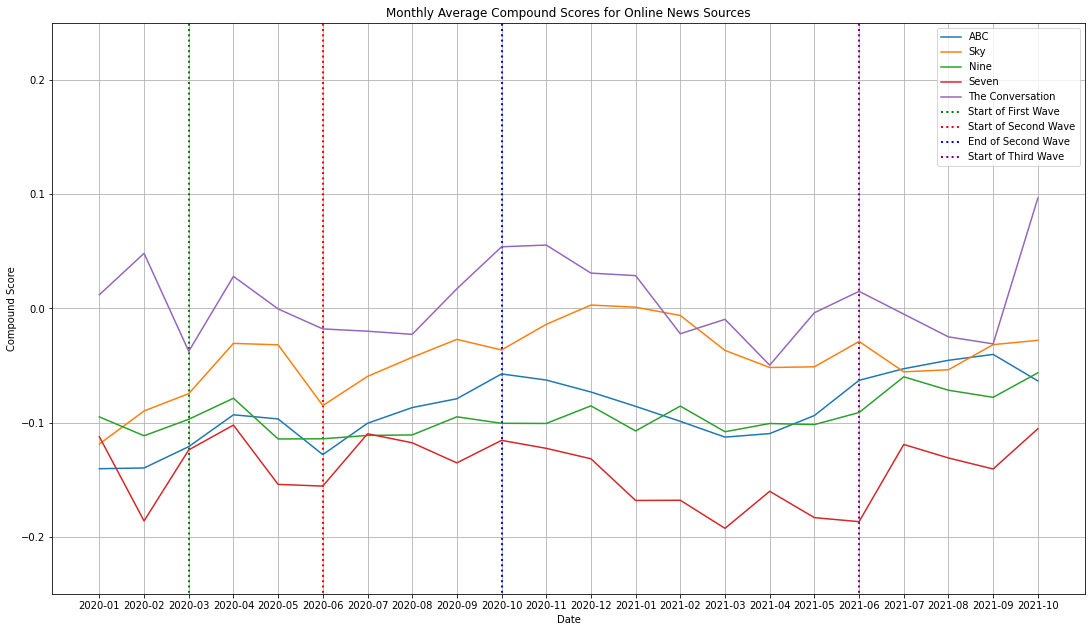

In [2]:
import numpy as np
import pandas as pd 
import nltk
from nltk.stem import PorterStemmer
from nltk.util import ngrams
from nltk import pos_tag
from nltk import RegexpParser
import fileinput
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import csv
import re
import matplotlib.pyplot as plt
from matplotlib import rcParams
from datetime import datetime
from collections import Counter
import matplotlib.dates as mdates

#Import stop words from nltk.corpus 
stopwords = set(nltk.corpus.stopwords.words('english'))


#Add additional stopwords manualy 
for word in ["its", "would", "us", "then", "so", "it", "thats", "going", "also", "get", "one", 'im','make', 'said','look','able','done','sure','think', 'way', 'go', 'know','got','time','ive','things','well','like','dont','say','right','theyre','first','two','come','every','making','put','want','hes']:
    stopwords.add(word)

#Read File    
df = pd.read_csv('abc2.csv')

df.sort_values(["Date2"], inplace=True)

df["Titles"]= df["Titles"].str.lower()

df["Titles"] = df["Titles"].apply(lambda x: " ".join([re.sub(r'[^\w\d]','', item.lower()) for item in x.split() if re.sub(r'[^\w\d]','', item.lower()) not in stopwords]))

sid = SentimentIntensityAnalyzer()

df['scores'] = df['Titles'].apply(lambda review: sid.polarity_scores(review))

df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])

df['comp_score'] = df['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

df['Month'] = df['Month'].astype(str)

df['Month'] = df['Month'].apply(lambda x: datetime.strptime(x, '%Y%m').strftime('%Y-%m'))


df = df.groupby('Month').compound.mean()

df = df.reset_index()

#Sky 
df2 = pd.read_csv('sky2.csv')
df2.sort_values(["Date2"], inplace=True)

df2["Titles"]= df2["Titles"].str.lower()

df2["Titles"] = df2["Titles"].apply(lambda x: " ".join([re.sub(r'[^\w\d]','', item.lower()) for item in x.split() if re.sub(r'[^\w\d]','', item.lower()) not in stopwords]))

df2['scores'] = df2['Titles'].apply(lambda review: sid.polarity_scores(review))

df2['compound']  = df2['scores'].apply(lambda score_dict: score_dict['compound'])

df2['comp_score'] = df2['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

df2['Month'] = df2['Month'].astype(str)

df2['Month'] = df2['Month'].apply(lambda x: datetime.strptime(x, '%Y%m').strftime('%Y-%m'))


df2 = df2.groupby('Month').compound.mean()

df2 = df2.reset_index()
#Nine
df3 = pd.read_csv('nine2.csv')
df3.sort_values(["Date2"], inplace=True)

df3["Titles"]= df3["Titles"].str.lower()

df3["Titles"] = df3["Titles"].apply(lambda x: " ".join([re.sub(r'[^\w\d]','', item.lower()) for item in x.split() if re.sub(r'[^\w\d]','', item.lower()) not in stopwords]))

df3['scores'] = df3['Titles'].apply(lambda review: sid.polarity_scores(review))

df3['compound']  = df3['scores'].apply(lambda score_dict: score_dict['compound'])

df3['comp_score'] = df3['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

df3['Month'] = df3['Month'].astype(str)

df3['Month'] = df3['Month'].apply(lambda x: datetime.strptime(x, '%Y%m').strftime('%Y-%m'))


df3 = df3.groupby('Month').compound.mean()

df3 = df3.reset_index()

#Seven
df4 = pd.read_csv('seven2.csv')
df4.sort_values(["Date2"], inplace=True)

df4["Titles"]= df4["Titles"].str.lower()

df4["Titles"] = df4["Titles"].apply(lambda x: " ".join([re.sub(r'[^\w\d]','', item.lower()) for item in x.split() if re.sub(r'[^\w\d]','', item.lower()) not in stopwords]))

df4['scores'] = df4['Titles'].apply(lambda review: sid.polarity_scores(review))

df4['compound']  = df4['scores'].apply(lambda score_dict: score_dict['compound'])

df4['comp_score'] = df4['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

df4['Month'] = df4['Month'].astype(str)

df4['Month'] = df4['Month'].apply(lambda x: datetime.strptime(x, '%Y%m').strftime('%Y-%m'))


df4 = df4.groupby('Month').compound.mean()

df4 = df4.reset_index()

#Conversation
df5 = pd.read_csv('conversation2.csv')
df5.sort_values(["Date2"], inplace=True)

df5["Titles"]= df5["Titles"].str.lower()

df5["Titles"] = df5["Titles"].apply(lambda x: " ".join([re.sub(r'[^\w\d]','', item.lower()) for item in x.split() if re.sub(r'[^\w\d]','', item.lower()) not in stopwords]))

df5['scores'] = df5['Titles'].apply(lambda review: sid.polarity_scores(review))

df5['compound']  = df5['scores'].apply(lambda score_dict: score_dict['compound'])

df5['comp_score'] = df5['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

df5['Month'] = df5['Month'].astype(str)

df5['Month'] = df5['Month'].apply(lambda x: datetime.strptime(x, '%Y%m').strftime('%Y-%m'))


df5 = df5.groupby('Month').compound.mean()

df5 = df5.reset_index()




x1 = df['Month'].values
y1 = df['compound'].values

x2 = df2['Month'].values
y2 = df2['compound'].values

x3 = df3['Month'].values
y3 = df3['compound'].values

x4 = df4['Month'].values
y4 = df4['compound'].values

x5 = df5['Month'].values
y5 = df5['compound'].values

fig = plt.figure(figsize=(18.5, 10.5))

plt.plot(x1,y1, label='ABC')
plt.plot(x2,y2, label='Sky')
plt.plot(x3,y3, label='Nine')
plt.plot(x4,y4, label='Seven')
plt.plot(x5,y5, label='The Conversation')

plt.title("Monthly Average Compound Scores for Online News Sources")

plt.xlabel("Date")

plt.ylabel("Compound Score")



plt.ylim(-0.25,0.25)

plt.grid(True)

plt.vlines(x='2020-03', ymin=-0.5, ymax=0.5, colors='green', ls=':', lw=2, label='Start of First Wave')



plt.vlines(x='2020-06', ymin=-0.5, ymax=0.5, colors='red', ls=':', lw=2, label='Start of Second Wave')

plt.vlines(x='2020-10', ymin=-0.5, ymax=0.5, colors='blue', ls=':', lw=2, label='End of Second Wave')

plt.vlines(x='2021-06', ymin=-0.5, ymax=0.5, colors='purple', ls=':', lw=2, label='Start of Third Wave')

plt.legend(loc=1); 

plt.show()

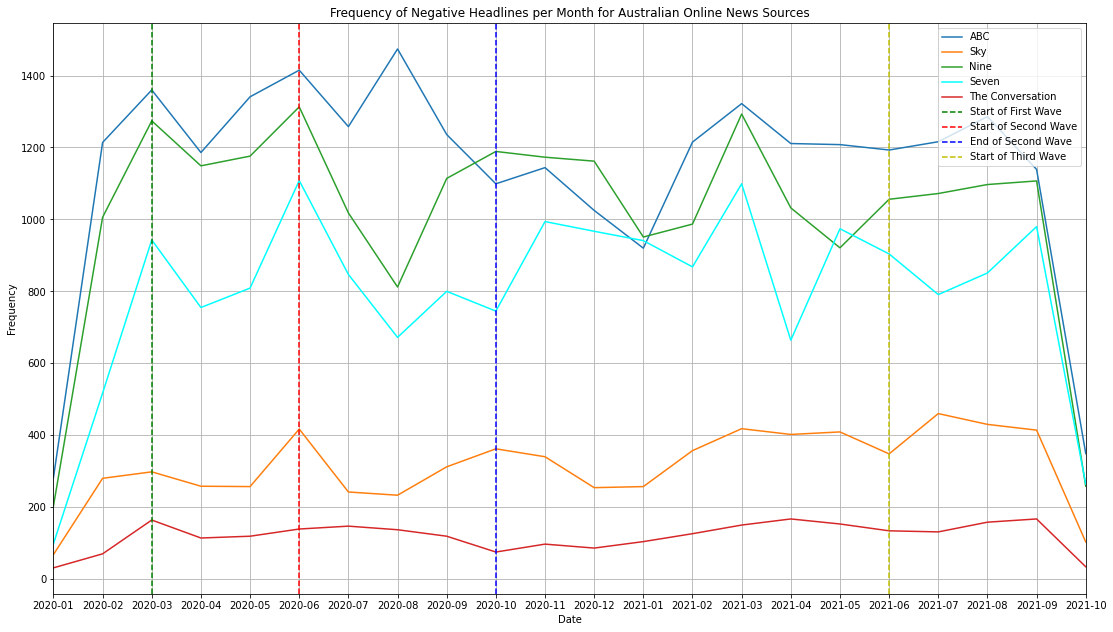

In [123]:
#Number of Negative and Positive words per month 
import numpy as np
import pandas as pd 
import nltk
from nltk.stem import PorterStemmer
from nltk.util import ngrams
from nltk import pos_tag
from nltk import RegexpParser
import fileinput
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import csv
import re
import matplotlib.pyplot as plt
from matplotlib import rcParams
from datetime import datetime
from collections import Counter


#Import stop words from nltk.corpus 
stopwords = set(nltk.corpus.stopwords.words('english'))


#Add additional stopwords manualy 
for word in ["its", "would", "us", "then", "so", "it", "thats", "going", "also", "get", "one", 'im','make', 'said','look','able','done','sure','think', 'way', 'go', 'know','got','time','ive','things','well','like','dont','say','right','theyre','first','two','come','every','making','put','want','hes']:
    stopwords.add(word)

#Read File    
df = pd.read_csv('abc2.csv')

df.sort_values(["Date2"], inplace=True)

df["Titles"]= df["Titles"].str.lower()

df["Titles"] = df["Titles"].apply(lambda x: " ".join([re.sub(r'[^\w\d]','', item.lower()) for item in x.split() if re.sub(r'[^\w\d]','', item.lower()) not in stopwords]))

sid = SentimentIntensityAnalyzer()

df['scores'] = df['Titles'].apply(lambda review: sid.polarity_scores(review))

df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])

df['comp_score'] = df['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

df = df.groupby(["Month", "comp_score"]).size().reset_index(name="Count")

df = df.loc[df['comp_score'] == 'neg']

df['Month'] = df['Month'].astype(str)

df['Month'] = df['Month'].apply(lambda x: datetime.strptime(x, '%Y%m').strftime('%Y-%m'))


df2 = pd.read_csv('sky2.csv')

df2.sort_values(["Date2"], inplace=True)

df2["Titles"]= df2["Titles"].str.lower()

df2["Titles"] = df2["Titles"].apply(lambda x: " ".join([re.sub(r'[^\w\d]','', item.lower()) for item in x.split() if re.sub(r'[^\w\d]','', item.lower()) not in stopwords]))

df2['scores'] = df2['Titles'].apply(lambda review: sid.polarity_scores(review))

df2['compound']  = df2['scores'].apply(lambda score_dict: score_dict['compound'])

df2['comp_score'] = df2['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

df2 = df2.groupby(["Month", "comp_score"]).size().reset_index(name="Count")

df2 = df2.loc[df2['comp_score'] == 'neg']

df2['Month'] = df2['Month'].astype(str)

df2['Month'] = df2['Month'].apply(lambda x: datetime.strptime(x, '%Y%m').strftime('%Y-%m'))


df3 = pd.read_csv('nine2.csv')

df3.sort_values(["Date2"], inplace=True)

df3["Titles"]= df3["Titles"].str.lower()

df3["Titles"] = df3["Titles"].apply(lambda x: " ".join([re.sub(r'[^\w\d]','', item.lower()) for item in x.split() if re.sub(r'[^\w\d]','', item.lower()) not in stopwords]))

df3['scores'] = df3['Titles'].apply(lambda review: sid.polarity_scores(review))

df3['compound']  = df3['scores'].apply(lambda score_dict: score_dict['compound'])

df3['comp_score'] = df3['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

df3 = df3.groupby(["Month", "comp_score"]).size().reset_index(name="Count")

df3 = df3.loc[df3['comp_score'] == 'neg']

df3['Month'] = df3['Month'].astype(str)

df3['Month'] = df3['Month'].apply(lambda x: datetime.strptime(x, '%Y%m').strftime('%Y-%m'))


df4 = pd.read_csv('seven2.csv')

df4.sort_values(["Date2"], inplace=True)

df4["Titles"]= df4["Titles"].str.lower()

df4["Titles"] = df4["Titles"].apply(lambda x: " ".join([re.sub(r'[^\w\d]','', item.lower()) for item in x.split() if re.sub(r'[^\w\d]','', item.lower()) not in stopwords]))

df4['scores'] = df4['Titles'].apply(lambda review: sid.polarity_scores(review))

df4['compound']  = df4['scores'].apply(lambda score_dict: score_dict['compound'])

df4['comp_score'] = df4['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

df4 = df4.groupby(["Month", "comp_score"]).size().reset_index(name="Count")

df4 = df4.loc[df4['comp_score'] == 'neg']

df4['Month'] = df4['Month'].astype(str)

df4['Month'] = df4['Month'].apply(lambda x: datetime.strptime(x, '%Y%m').strftime('%Y-%m'))


df5 = pd.read_csv('conversation2.csv')

df5.sort_values(["Date2"], inplace=True)

df5["Titles"]= df5["Titles"].str.lower()

df5["Titles"] = df5["Titles"].apply(lambda x: " ".join([re.sub(r'[^\w\d]','', item.lower()) for item in x.split() if re.sub(r'[^\w\d]','', item.lower()) not in stopwords]))

df5['scores'] = df5['Titles'].apply(lambda review: sid.polarity_scores(review))

df5['compound']  = df5['scores'].apply(lambda score_dict: score_dict['compound'])

df5['comp_score'] = df5['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

df5 = df5.groupby(["Month", "comp_score"]).size().reset_index(name="Count")

df5 = df5.loc[df5['comp_score'] == 'neg']

df5['Month'] = df5['Month'].astype(str)

df5['Month'] = df5['Month'].apply(lambda x: datetime.strptime(x, '%Y%m').strftime('%Y-%m'))


# x1 = df['Month'].values
# y1 = df['Count'].values

# x2 = df2['Month'].values
# y2 = df2['Count'].values

# x3 = df3['Month'].values
# y3 = df3['Count'].values

# x4 = df4['Month'].values
# y4 = df4['Count'].values

# x5 = df5['Month'].values
# y5 = df5['Count'].values

fig, ax = plt.subplots(figsize=(18.5, 10.5))



plt.plot(df['Month'],df['Count'], label='ABC')

plt.plot(df2['Month'],df2['Count'], label='Sky')

plt.plot(df3['Month'],df3['Count'], label='Nine')

plt.plot(df4['Month'],df4['Count'], label='Seven',color="cyan")

plt.plot(df5['Month'],df5['Count'], label='The Conversation')

# plt.plot(df2['Date2'],df2['compound'])

ax.set(xlabel="Date",
       ylabel="Frequency",
       title="Frequency of Negative Headlines per Month for Australian Online News Sources",
       xlim=["2020-01", "2021-10"])

# ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.axvline(x='2020-03', color = 'g',label='Start of First Wave',linestyle='--')

plt.axvline(x='2020-06' ,color = 'r', label='Start of Second Wave', linestyle='--')

plt.axvline(x='2020-10', color = 'b',  label='End of Second Wave', linestyle='--')

plt.axvline(x='2021-06', color = 'y',  label='Start of Third Wave', linestyle='--')

plt.grid(True)






plt.legend(loc=1); 

plt.show()


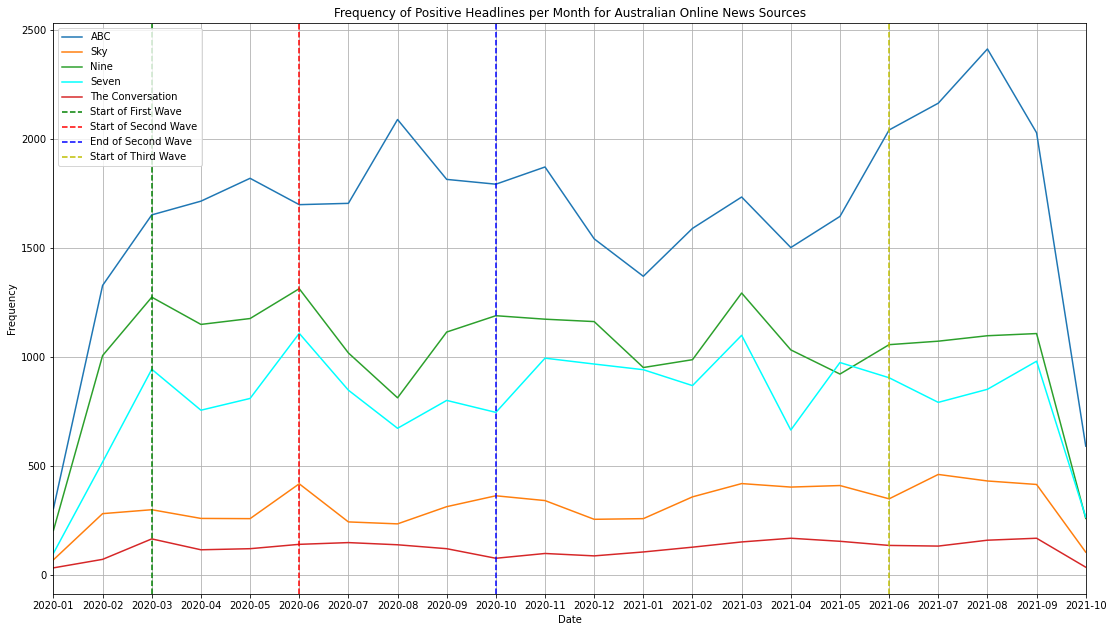

In [124]:
#Number of Positive words per month 
import numpy as np
import pandas as pd 
import nltk
from nltk.stem import PorterStemmer
from nltk.util import ngrams
from nltk import pos_tag
from nltk import RegexpParser
import fileinput
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import csv
import re
import matplotlib.pyplot as plt
from matplotlib import rcParams
from datetime import datetime
from collections import Counter


#Import stop words from nltk.corpus 
stopwords = set(nltk.corpus.stopwords.words('english'))


#Add additional stopwords manualy 
for word in ["its", "would", "us", "then", "so", "it", "thats", "going", "also", "get", "one", 'im','make', 'said','look','able','done','sure','think', 'way', 'go', 'know','got','time','ive','things','well','like','dont','say','right','theyre','first','two','come','every','making','put','want','hes']:
    stopwords.add(word)

#Read File    
df = pd.read_csv('abc2.csv')

df.sort_values(["Date2"], inplace=True)

df["Titles"]= df["Titles"].str.lower()

df["Titles"] = df["Titles"].apply(lambda x: " ".join([re.sub(r'[^\w\d]','', item.lower()) for item in x.split() if re.sub(r'[^\w\d]','', item.lower()) not in stopwords]))

sid = SentimentIntensityAnalyzer()

df['scores'] = df['Titles'].apply(lambda review: sid.polarity_scores(review))

df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])

df['comp_score'] = df['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

df = df.groupby(["Month", "comp_score"]).size().reset_index(name="Count")

df = df.loc[df['comp_score'] == 'pos']

df['Month'] = df['Month'].astype(str)

df['Month'] = df['Month'].apply(lambda x: datetime.strptime(x, '%Y%m').strftime('%Y-%m'))


df2 = pd.read_csv('sky2.csv')

df2.sort_values(["Date2"], inplace=True)

df2["Titles"]= df2["Titles"].str.lower()

df2["Titles"] = df2["Titles"].apply(lambda x: " ".join([re.sub(r'[^\w\d]','', item.lower()) for item in x.split() if re.sub(r'[^\w\d]','', item.lower()) not in stopwords]))

df2['scores'] = df2['Titles'].apply(lambda review: sid.polarity_scores(review))

df2['compound']  = df2['scores'].apply(lambda score_dict: score_dict['compound'])

df2['comp_score'] = df2['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

df2 = df2.groupby(["Month", "comp_score"]).size().reset_index(name="Count")

df2 = df2.loc[df2['comp_score'] == 'neg']

df2['Month'] = df2['Month'].astype(str)

df2['Month'] = df2['Month'].apply(lambda x: datetime.strptime(x, '%Y%m').strftime('%Y-%m'))


df3 = pd.read_csv('nine2.csv')

df3.sort_values(["Date2"], inplace=True)

df3["Titles"]= df3["Titles"].str.lower()

df3["Titles"] = df3["Titles"].apply(lambda x: " ".join([re.sub(r'[^\w\d]','', item.lower()) for item in x.split() if re.sub(r'[^\w\d]','', item.lower()) not in stopwords]))

df3['scores'] = df3['Titles'].apply(lambda review: sid.polarity_scores(review))

df3['compound']  = df3['scores'].apply(lambda score_dict: score_dict['compound'])

df3['comp_score'] = df3['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

df3 = df3.groupby(["Month", "comp_score"]).size().reset_index(name="Count")

df3 = df3.loc[df3['comp_score'] == 'neg']

df3['Month'] = df3['Month'].astype(str)

df3['Month'] = df3['Month'].apply(lambda x: datetime.strptime(x, '%Y%m').strftime('%Y-%m'))


df4 = pd.read_csv('seven2.csv')

df4.sort_values(["Date2"], inplace=True)

df4["Titles"]= df4["Titles"].str.lower()

df4["Titles"] = df4["Titles"].apply(lambda x: " ".join([re.sub(r'[^\w\d]','', item.lower()) for item in x.split() if re.sub(r'[^\w\d]','', item.lower()) not in stopwords]))

df4['scores'] = df4['Titles'].apply(lambda review: sid.polarity_scores(review))

df4['compound']  = df4['scores'].apply(lambda score_dict: score_dict['compound'])

df4['comp_score'] = df4['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

df4 = df4.groupby(["Month", "comp_score"]).size().reset_index(name="Count")

df4 = df4.loc[df4['comp_score'] == 'neg']

df4['Month'] = df4['Month'].astype(str)

df4['Month'] = df4['Month'].apply(lambda x: datetime.strptime(x, '%Y%m').strftime('%Y-%m'))


df5 = pd.read_csv('conversation2.csv')

df5.sort_values(["Date2"], inplace=True)

df5["Titles"]= df5["Titles"].str.lower()

df5["Titles"] = df5["Titles"].apply(lambda x: " ".join([re.sub(r'[^\w\d]','', item.lower()) for item in x.split() if re.sub(r'[^\w\d]','', item.lower()) not in stopwords]))

df5['scores'] = df5['Titles'].apply(lambda review: sid.polarity_scores(review))

df5['compound']  = df5['scores'].apply(lambda score_dict: score_dict['compound'])

df5['comp_score'] = df5['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

df5 = df5.groupby(["Month", "comp_score"]).size().reset_index(name="Count")

df5 = df5.loc[df5['comp_score'] == 'neg']

df5['Month'] = df5['Month'].astype(str)

df5['Month'] = df5['Month'].apply(lambda x: datetime.strptime(x, '%Y%m').strftime('%Y-%m'))


# x1 = df['Month'].values
# y1 = df['Count'].values

# x2 = df2['Month'].values
# y2 = df2['Count'].values

# x3 = df3['Month'].values
# y3 = df3['Count'].values

# x4 = df4['Month'].values
# y4 = df4['Count'].values

# x5 = df5['Month'].values
# y5 = df5['Count'].values

fig, ax = plt.subplots(figsize=(18.5, 10.5))



plt.plot(df['Month'],df['Count'], label='ABC')

plt.plot(df2['Month'],df2['Count'], label='Sky')

plt.plot(df3['Month'],df3['Count'], label='Nine')

plt.plot(df4['Month'],df4['Count'], label='Seven',color="cyan")

plt.plot(df5['Month'],df5['Count'], label='The Conversation')

# plt.plot(df2['Date2'],df2['compound'])

ax.set(xlabel="Date",
       ylabel="Frequency",
       title="Frequency of Positive Headlines per Month for Australian Online News Sources",
       xlim=["2020-01", "2021-10"])

# ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.axvline(x='2020-03', color = 'g',label='Start of First Wave',linestyle='--')

plt.axvline(x='2020-06' ,color = 'r', label='Start of Second Wave', linestyle='--')

plt.axvline(x='2020-10', color = 'b',  label='End of Second Wave', linestyle='--')

plt.axvline(x='2021-06', color = 'y',  label='Start of Third Wave', linestyle='--')

plt.grid(True)






plt.legend(loc=2); 

plt.show()

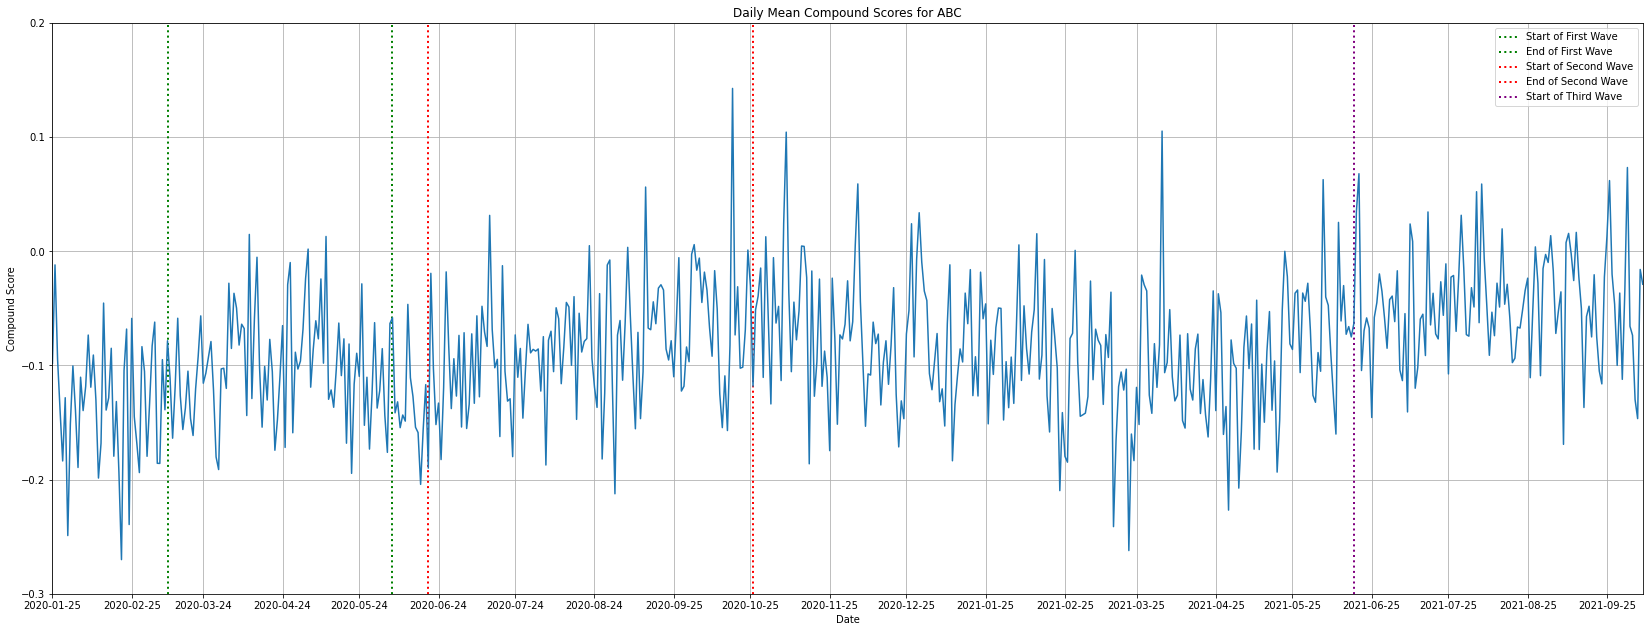

In [168]:
import numpy as np
import pandas as pd 
import nltk
from nltk.stem import PorterStemmer
from nltk.util import ngrams
from nltk import pos_tag
from nltk import RegexpParser
import fileinput
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import csv
import re
import matplotlib.pyplot as plt
from matplotlib import rcParams
from datetime import datetime
from collections import Counter
import matplotlib.dates as mdates
import itertools

#Import stop words from nltk.corpus 
stopwords = set(nltk.corpus.stopwords.words('english'))


#Add additional stopwords manualy 
for word in ["its", "would", "us", "then", "so", "it", "thats", "going", "also", "get", "one", 'im','make', 'said','look','able','done','sure','think', 'way', 'go', 'know','got','time','ive','things','well','like','dont','say','right','theyre','first','two','come','every','making','put','want','hes']:
    stopwords.add(word)

#Read File    
df = pd.read_csv('abc2.csv')

df.sort_values(["Date2"], inplace=True)

df["Titles"]= df["Titles"].str.lower()

df["Titles"] = df["Titles"].apply(lambda x: " ".join([re.sub(r'[^\w\d]','', item.lower()) for item in x.split() if re.sub(r'[^\w\d]','', item.lower()) not in stopwords]))

sid = SentimentIntensityAnalyzer()

df['scores'] = df['Titles'].apply(lambda review: sid.polarity_scores(review))

df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])

df['comp_score'] = df['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

df['Date2'] = df['Date2'].astype(str)

df['Date2'] = df['Date2'].apply(lambda x: datetime.strptime(x, '%Y%m%d').strftime('%Y-%m-%d'))


df = df.groupby('Date2').compound.mean()

df = df.reset_index()

#Sky 
df2 = pd.read_csv('sky2.csv')
df2.sort_values(["Date2"], inplace=True)

df2["Titles"]= df2["Titles"].str.lower()

df2["Titles"] = df2["Titles"].apply(lambda x: " ".join([re.sub(r'[^\w\d]','', item.lower()) for item in x.split() if re.sub(r'[^\w\d]','', item.lower()) not in stopwords]))

df2['scores'] = df2['Titles'].apply(lambda review: sid.polarity_scores(review))

df2['compound']  = df2['scores'].apply(lambda score_dict: score_dict['compound'])

df2['comp_score'] = df2['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

df2['Date2'] = df2['Date2'].astype(str)

df2['Date2'] = df2['Date2'].apply(lambda x: datetime.strptime(x, '%Y%m%d').strftime('%Y-%m-%d'))


df2 = df2.groupby('Date2').compound.mean()

df2 = df2.reset_index()
#Nine
df3 = pd.read_csv('nine2.csv')
df3.sort_values(["Date2"], inplace=True)

df3["Titles"]= df3["Titles"].str.lower()

df3["Titles"] = df3["Titles"].apply(lambda x: " ".join([re.sub(r'[^\w\d]','', item.lower()) for item in x.split() if re.sub(r'[^\w\d]','', item.lower()) not in stopwords]))

df3['scores'] = df3['Titles'].apply(lambda review: sid.polarity_scores(review))

df3['compound']  = df3['scores'].apply(lambda score_dict: score_dict['compound'])

df3['comp_score'] = df3['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

df3['Date2'] = df3['Date2'].astype(str)

df3['Date2'] = df3['Date2'].apply(lambda x: datetime.strptime(x, '%Y%m%d').strftime('%Y-%m-%d'))


df3 = df3.groupby('Date2').compound.mean()

df3 = df3.reset_index()

#Seven
df4 = pd.read_csv('seven2.csv')
df4.sort_values(["Date2"], inplace=True)

df4["Titles"]= df4["Titles"].str.lower()

df4["Titles"] = df4["Titles"].apply(lambda x: " ".join([re.sub(r'[^\w\d]','', item.lower()) for item in x.split() if re.sub(r'[^\w\d]','', item.lower()) not in stopwords]))

df4['scores'] = df4['Titles'].apply(lambda review: sid.polarity_scores(review))

df4['compound']  = df4['scores'].apply(lambda score_dict: score_dict['compound'])

df4['comp_score'] = df4['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

df4['Date2'] = df4['Date2'].astype(str)

df4['Date2'] = df4['Date2'].apply(lambda x: datetime.strptime(x, '%Y%m%d').strftime('%Y-%m-%d'))


df4 = df4.groupby('Date2').compound.mean()

df4 = df4.reset_index()

#Conversation
df5 = pd.read_csv('conversation2.csv')
df5.sort_values(["Date2"], inplace=True)

df5["Titles"]= df5["Titles"].str.lower()

df5["Titles"] = df5["Titles"].apply(lambda x: " ".join([re.sub(r'[^\w\d]','', item.lower()) for item in x.split() if re.sub(r'[^\w\d]','', item.lower()) not in stopwords]))

df5['scores'] = df5['Titles'].apply(lambda review: sid.polarity_scores(review))

df5['compound']  = df5['scores'].apply(lambda score_dict: score_dict['compound'])

df5['comp_score'] = df5['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

df5['Date2'] = df5['Date2'].astype(str)

df5['Date2'] = df5['Date2'].apply(lambda x: datetime.strptime(x, '%Y%m%d').strftime('%Y-%m-%d'))


df5 = df5.groupby('Date2').compound.mean()

df5 = df5.reset_index()




fig, ax = plt.subplots(figsize=(28.5, 10.5))

plt.plot(df['Date2'],df['compound'])

# plt.plot(df2['Date2'],df2['compound'])

ax.set(xlabel="Date",
       ylabel="Compound Score",
       title="Daily Mean Compound Scores for ABC",
       xlim=["2020-01-25", "2021-10-09"])

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.vlines(x='2020-03-10', ymin=-0.5, ymax=0.5, colors='green', ls=':', lw=2, label='Start of First Wave')

plt.vlines(x='2020-06-06', ymin=-0.5, ymax=0.5, colors='green', ls=':', lw=2, label='End of First Wave')

plt.vlines(x='2020-06-20', ymin=-0.5, ymax=0.5, colors='red', ls=':', lw=2, label='Start of Second Wave')

plt.vlines(x='2020-10-26', ymin=-0.5, ymax=0.5, colors='red', ls=':', lw=2, label='End of Second Wave')

plt.vlines(x='2021-06-18', ymin=-0.5, ymax=0.5, colors='purple', ls=':', lw=2, label='Start of Third Wave')

plt.grid(True)


plt.ylim(-0.3,0.2)



plt.legend(loc=1); 

plt.show()

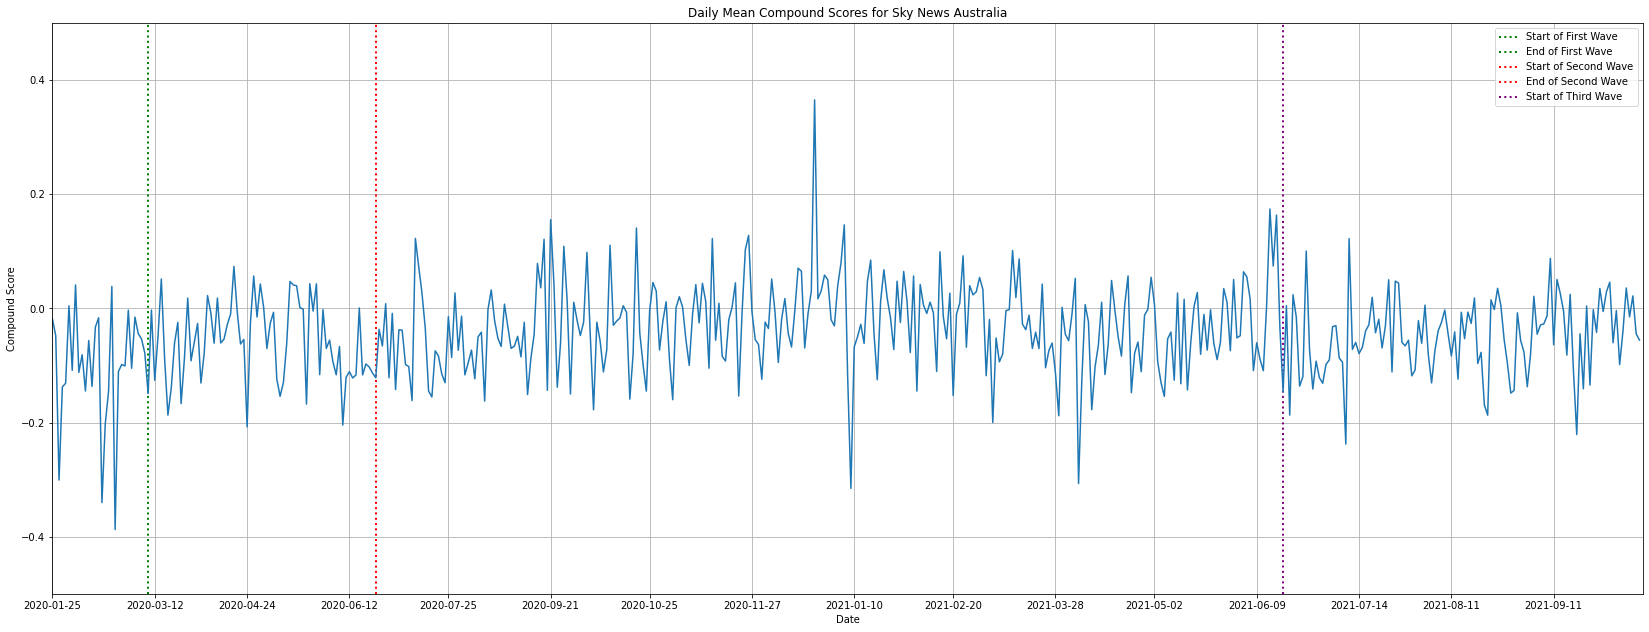

In [169]:
import numpy as np
import pandas as pd 
import nltk
from nltk.stem import PorterStemmer
from nltk.util import ngrams
from nltk import pos_tag
from nltk import RegexpParser
import fileinput
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import csv
import re
import matplotlib.pyplot as plt
from matplotlib import rcParams
from datetime import datetime
from collections import Counter
import matplotlib.dates as mdates
import itertools

#Import stop words from nltk.corpus 
stopwords = set(nltk.corpus.stopwords.words('english'))


#Add additional stopwords manualy 
for word in ["its", "would", "us", "then", "so", "it", "thats", "going", "also", "get", "one", 'im','make', 'said','look','able','done','sure','think', 'way', 'go', 'know','got','time','ive','things','well','like','dont','say','right','theyre','first','two','come','every','making','put','want','hes']:
    stopwords.add(word)

#Read File    
df = pd.read_csv('abc2.csv')

df.sort_values(["Date2"], inplace=True)

df["Titles"]= df["Titles"].str.lower()

df["Titles"] = df["Titles"].apply(lambda x: " ".join([re.sub(r'[^\w\d]','', item.lower()) for item in x.split() if re.sub(r'[^\w\d]','', item.lower()) not in stopwords]))

sid = SentimentIntensityAnalyzer()

df['scores'] = df['Titles'].apply(lambda review: sid.polarity_scores(review))

df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])

df['comp_score'] = df['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

df['Date2'] = df['Date2'].astype(str)

df['Date2'] = df['Date2'].apply(lambda x: datetime.strptime(x, '%Y%m%d').strftime('%Y-%m-%d'))


df = df.groupby('Date2').compound.mean()

df = df.reset_index()

#Sky 
df2 = pd.read_csv('sky2.csv')
df2.sort_values(["Date2"], inplace=True)

df2["Titles"]= df2["Titles"].str.lower()

df2["Titles"] = df2["Titles"].apply(lambda x: " ".join([re.sub(r'[^\w\d]','', item.lower()) for item in x.split() if re.sub(r'[^\w\d]','', item.lower()) not in stopwords]))

df2['scores'] = df2['Titles'].apply(lambda review: sid.polarity_scores(review))

df2['compound']  = df2['scores'].apply(lambda score_dict: score_dict['compound'])

df2['comp_score'] = df2['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

df2['Date2'] = df2['Date2'].astype(str)

df2['Date2'] = df2['Date2'].apply(lambda x: datetime.strptime(x, '%Y%m%d').strftime('%Y-%m-%d'))


df2 = df2.groupby('Date2').compound.mean()

df2 = df2.reset_index()
#Nine
df3 = pd.read_csv('nine2.csv')
df3.sort_values(["Date2"], inplace=True)

df3["Titles"]= df3["Titles"].str.lower()

df3["Titles"] = df3["Titles"].apply(lambda x: " ".join([re.sub(r'[^\w\d]','', item.lower()) for item in x.split() if re.sub(r'[^\w\d]','', item.lower()) not in stopwords]))

df3['scores'] = df3['Titles'].apply(lambda review: sid.polarity_scores(review))

df3['compound']  = df3['scores'].apply(lambda score_dict: score_dict['compound'])

df3['comp_score'] = df3['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

df3['Date2'] = df3['Date2'].astype(str)

df3['Date2'] = df3['Date2'].apply(lambda x: datetime.strptime(x, '%Y%m%d').strftime('%Y-%m-%d'))


df3 = df3.groupby('Date2').compound.mean()

df3 = df3.reset_index()

#Seven
df4 = pd.read_csv('seven2.csv')
df4.sort_values(["Date2"], inplace=True)

df4["Titles"]= df4["Titles"].str.lower()

df4["Titles"] = df4["Titles"].apply(lambda x: " ".join([re.sub(r'[^\w\d]','', item.lower()) for item in x.split() if re.sub(r'[^\w\d]','', item.lower()) not in stopwords]))

df4['scores'] = df4['Titles'].apply(lambda review: sid.polarity_scores(review))

df4['compound']  = df4['scores'].apply(lambda score_dict: score_dict['compound'])

df4['comp_score'] = df4['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

df4['Date2'] = df4['Date2'].astype(str)

df4['Date2'] = df4['Date2'].apply(lambda x: datetime.strptime(x, '%Y%m%d').strftime('%Y-%m-%d'))


df4 = df4.groupby('Date2').compound.mean()

df4 = df4.reset_index()

#Conversation
df5 = pd.read_csv('conversation2.csv')
df5.sort_values(["Date2"], inplace=True)

df5["Titles"]= df5["Titles"].str.lower()

df5["Titles"] = df5["Titles"].apply(lambda x: " ".join([re.sub(r'[^\w\d]','', item.lower()) for item in x.split() if re.sub(r'[^\w\d]','', item.lower()) not in stopwords]))

df5['scores'] = df5['Titles'].apply(lambda review: sid.polarity_scores(review))

df5['compound']  = df5['scores'].apply(lambda score_dict: score_dict['compound'])

df5['comp_score'] = df5['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

df5['Date2'] = df5['Date2'].astype(str)

df5['Date2'] = df5['Date2'].apply(lambda x: datetime.strptime(x, '%Y%m%d').strftime('%Y-%m-%d'))


df5 = df5.groupby('Date2').compound.mean()

df5 = df5.reset_index()




fig, ax = plt.subplots(figsize=(28.5, 10.5))

plt.plot(df2['Date2'],df2['compound'])

# plt.plot(df2['Date2'],df2['compound'])

ax.set(xlabel="Date",
       ylabel="Compound Score",
       title="Daily Mean Compound Scores for Sky News Australia",
       xlim=["2020-01-25", "2021-10-09"])

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.vlines(x='2020-03-10', ymin=-0.5, ymax=0.5, colors='green', ls=':', lw=2, label='Start of First Wave')

plt.vlines(x='2020-06-06', ymin=-0.5, ymax=0.5, colors='green', ls=':', lw=2, label='End of First Wave')

plt.vlines(x='2020-06-20', ymin=-0.5, ymax=0.5, colors='red', ls=':', lw=2, label='Start of Second Wave')

plt.vlines(x='2020-10-26', ymin=-0.5, ymax=0.5, colors='red', ls=':', lw=2, label='End of Second Wave')

plt.vlines(x='2021-06-18', ymin=-0.5, ymax=0.5, colors='purple', ls=':', lw=2, label='Start of Third Wave')



plt.grid(True)


plt.ylim(-0.5,0.5)



plt.legend(loc=1); 

plt.show()

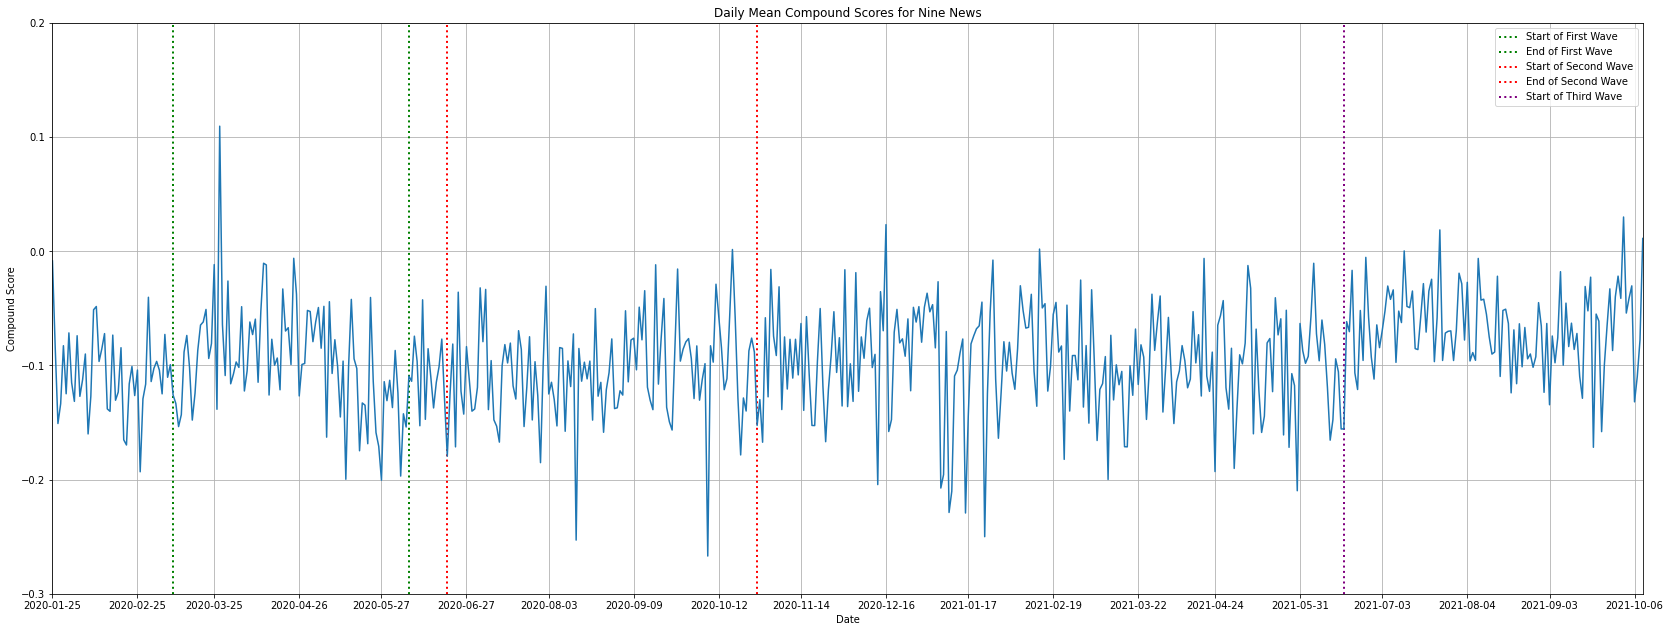

In [170]:
import numpy as np
import pandas as pd 
import nltk
from nltk.stem import PorterStemmer
from nltk.util import ngrams
from nltk import pos_tag
from nltk import RegexpParser
import fileinput
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import csv
import re
import matplotlib.pyplot as plt
from matplotlib import rcParams
from datetime import datetime
from collections import Counter
import matplotlib.dates as mdates
import itertools

#Import stop words from nltk.corpus 
stopwords = set(nltk.corpus.stopwords.words('english'))


#Add additional stopwords manualy 
for word in ["its", "would", "us", "then", "so", "it", "thats", "going", "also", "get", "one", 'im','make', 'said','look','able','done','sure','think', 'way', 'go', 'know','got','time','ive','things','well','like','dont','say','right','theyre','first','two','come','every','making','put','want','hes']:
    stopwords.add(word)

#Read File    
df = pd.read_csv('abc2.csv')

df.sort_values(["Date2"], inplace=True)

df["Titles"]= df["Titles"].str.lower()

df["Titles"] = df["Titles"].apply(lambda x: " ".join([re.sub(r'[^\w\d]','', item.lower()) for item in x.split() if re.sub(r'[^\w\d]','', item.lower()) not in stopwords]))

sid = SentimentIntensityAnalyzer()

df['scores'] = df['Titles'].apply(lambda review: sid.polarity_scores(review))

df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])

df['comp_score'] = df['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

df['Date2'] = df['Date2'].astype(str)

df['Date2'] = df['Date2'].apply(lambda x: datetime.strptime(x, '%Y%m%d').strftime('%Y-%m-%d'))


df = df.groupby('Date2').compound.mean()

df = df.reset_index()

#Sky 
df2 = pd.read_csv('sky2.csv')
df2.sort_values(["Date2"], inplace=True)

df2["Titles"]= df2["Titles"].str.lower()

df2["Titles"] = df2["Titles"].apply(lambda x: " ".join([re.sub(r'[^\w\d]','', item.lower()) for item in x.split() if re.sub(r'[^\w\d]','', item.lower()) not in stopwords]))

df2['scores'] = df2['Titles'].apply(lambda review: sid.polarity_scores(review))

df2['compound']  = df2['scores'].apply(lambda score_dict: score_dict['compound'])

df2['comp_score'] = df2['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

df2['Date2'] = df2['Date2'].astype(str)

df2['Date2'] = df2['Date2'].apply(lambda x: datetime.strptime(x, '%Y%m%d').strftime('%Y-%m-%d'))


df2 = df2.groupby('Date2').compound.mean()

df2 = df2.reset_index()
#Nine
df3 = pd.read_csv('nine2.csv')
df3.sort_values(["Date2"], inplace=True)

df3["Titles"]= df3["Titles"].str.lower()

df3["Titles"] = df3["Titles"].apply(lambda x: " ".join([re.sub(r'[^\w\d]','', item.lower()) for item in x.split() if re.sub(r'[^\w\d]','', item.lower()) not in stopwords]))

df3['scores'] = df3['Titles'].apply(lambda review: sid.polarity_scores(review))

df3['compound']  = df3['scores'].apply(lambda score_dict: score_dict['compound'])

df3['comp_score'] = df3['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

df3['Date2'] = df3['Date2'].astype(str)

df3['Date2'] = df3['Date2'].apply(lambda x: datetime.strptime(x, '%Y%m%d').strftime('%Y-%m-%d'))


df3 = df3.groupby('Date2').compound.mean()

df3 = df3.reset_index()

#Seven
df4 = pd.read_csv('seven2.csv')
df4.sort_values(["Date2"], inplace=True)

df4["Titles"]= df4["Titles"].str.lower()

df4["Titles"] = df4["Titles"].apply(lambda x: " ".join([re.sub(r'[^\w\d]','', item.lower()) for item in x.split() if re.sub(r'[^\w\d]','', item.lower()) not in stopwords]))

df4['scores'] = df4['Titles'].apply(lambda review: sid.polarity_scores(review))

df4['compound']  = df4['scores'].apply(lambda score_dict: score_dict['compound'])

df4['comp_score'] = df4['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

df4['Date2'] = df4['Date2'].astype(str)

df4['Date2'] = df4['Date2'].apply(lambda x: datetime.strptime(x, '%Y%m%d').strftime('%Y-%m-%d'))


df4 = df4.groupby('Date2').compound.mean()

df4 = df4.reset_index()

#Conversation
df5 = pd.read_csv('conversation2.csv')
df5.sort_values(["Date2"], inplace=True)

df5["Titles"]= df5["Titles"].str.lower()

df5["Titles"] = df5["Titles"].apply(lambda x: " ".join([re.sub(r'[^\w\d]','', item.lower()) for item in x.split() if re.sub(r'[^\w\d]','', item.lower()) not in stopwords]))

df5['scores'] = df5['Titles'].apply(lambda review: sid.polarity_scores(review))

df5['compound']  = df5['scores'].apply(lambda score_dict: score_dict['compound'])

df5['comp_score'] = df5['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

df5['Date2'] = df5['Date2'].astype(str)

df5['Date2'] = df5['Date2'].apply(lambda x: datetime.strptime(x, '%Y%m%d').strftime('%Y-%m-%d'))


df5 = df5.groupby('Date2').compound.mean()

df5 = df5.reset_index()




fig, ax = plt.subplots(figsize=(28.5, 10.5))

plt.plot(df3['Date2'],df3['compound'])

# plt.plot(df2['Date2'],df2['compound'])

ax.set(xlabel="Date",
       ylabel="Compound Score",
       title="Daily Mean Compound Scores for Nine News",
       xlim=["2020-01-25", "2021-10-09"])

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.vlines(x='2020-03-10', ymin=-0.5, ymax=0.5, colors='green', ls=':', lw=2, label='Start of First Wave')

plt.vlines(x='2020-06-06', ymin=-0.5, ymax=0.5, colors='green', ls=':', lw=2, label='End of First Wave')

plt.vlines(x='2020-06-20', ymin=-0.5, ymax=0.5, colors='red', ls=':', lw=2, label='Start of Second Wave')

plt.vlines(x='2020-10-26', ymin=-0.5, ymax=0.5, colors='red', ls=':', lw=2, label='End of Second Wave')

plt.vlines(x='2021-06-18', ymin=-0.5, ymax=0.5, colors='purple', ls=':', lw=2, label='Start of Third Wave')



plt.grid(True)


plt.ylim(-0.3,0.2)



plt.legend(loc=1); 

plt.show()

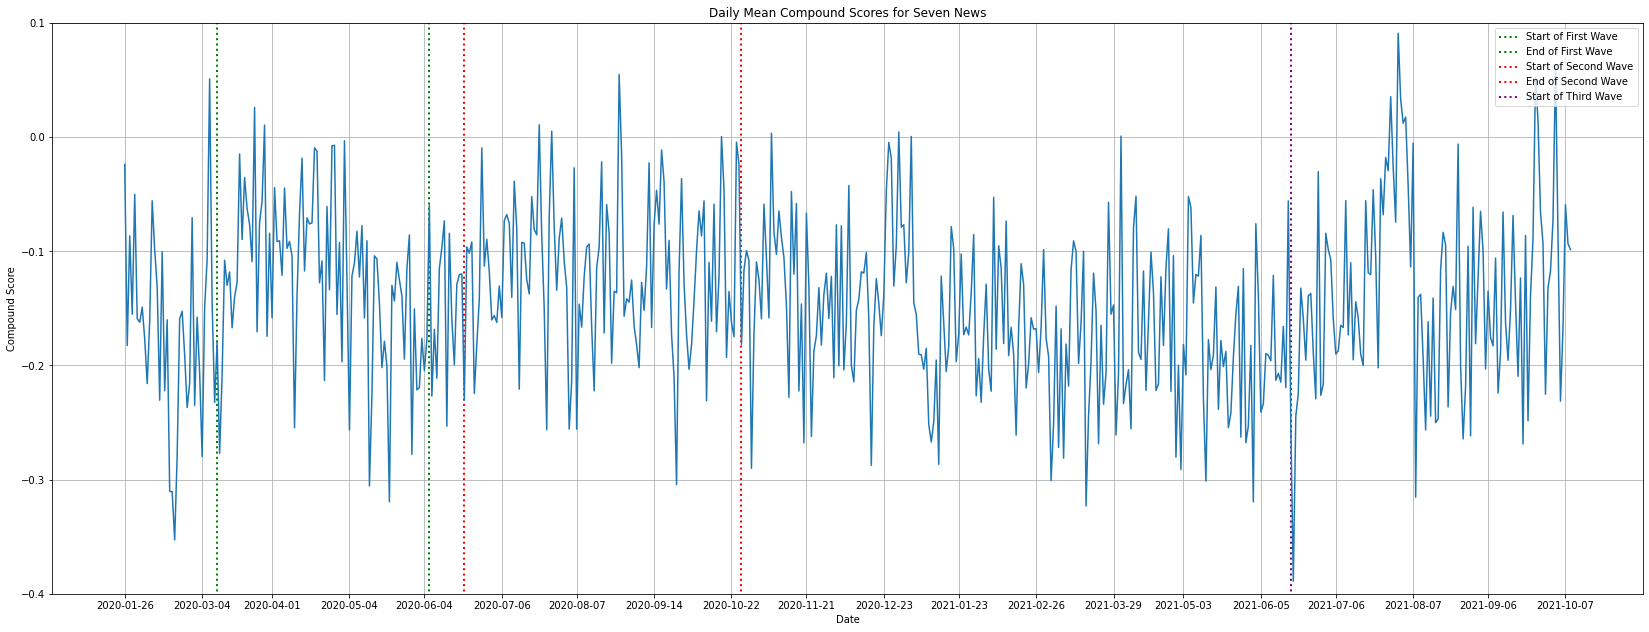

In [171]:
import numpy as np
import pandas as pd 
import nltk
from nltk.stem import PorterStemmer
from nltk.util import ngrams
from nltk import pos_tag
from nltk import RegexpParser
import fileinput
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import csv
import re
import matplotlib.pyplot as plt
from matplotlib import rcParams
from datetime import datetime
from collections import Counter
import matplotlib.dates as mdates
import itertools

#Import stop words from nltk.corpus 
stopwords = set(nltk.corpus.stopwords.words('english'))


#Add additional stopwords manualy 
for word in ["its", "would", "us", "then", "so", "it", "thats", "going", "also", "get", "one", 'im','make', 'said','look','able','done','sure','think', 'way', 'go', 'know','got','time','ive','things','well','like','dont','say','right','theyre','first','two','come','every','making','put','want','hes']:
    stopwords.add(word)


df4 = pd.read_csv('seven2.csv')
df4.sort_values(["Date2"], inplace=True)

df4["Titles"]= df4["Titles"].str.lower()

df4["Titles"] = df4["Titles"].apply(lambda x: " ".join([re.sub(r'[^\w\d]','', item.lower()) for item in x.split() if re.sub(r'[^\w\d]','', item.lower()) not in stopwords]))

df4['scores'] = df4['Titles'].apply(lambda review: sid.polarity_scores(review))

df4['compound']  = df4['scores'].apply(lambda score_dict: score_dict['compound'])

df4['comp_score'] = df4['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

df4['Date2'] = df4['Date2'].astype(str)

df4['Date2'] = df4['Date2'].apply(lambda x: datetime.strptime(x, '%Y%m%d').strftime('%Y-%m-%d'))


df4 = df4.groupby('Date2').compound.mean()

df4 = df4.reset_index()


x4 = df4['Date2'].values
y4 = df4['compound'].values


fig, ax = plt.subplots(figsize=(28.5, 10.5))

plt.plot(x4,y4)

# plt.plot(df2['Date2'],df2['compound'])

ax.set(xlabel="Date",
       ylabel="Compound Score",
       title="Daily Mean Compound Scores for Seven News")

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.vlines(x='2020-03-10', ymin=-0.5, ymax=0.5, colors='green', ls=':', lw=2, label='Start of First Wave')

plt.vlines(x='2020-06-06', ymin=-0.5, ymax=0.5, colors='green', ls=':', lw=2, label='End of First Wave')

plt.vlines(x='2020-06-20', ymin=-0.5, ymax=0.5, colors='red', ls=':', lw=2, label='Start of Second Wave')

plt.vlines(x='2020-10-26', ymin=-0.5, ymax=0.5, colors='red', ls=':', lw=2, label='End of Second Wave')

plt.vlines(x='2021-06-18', ymin=-0.5, ymax=0.5, colors='purple', ls=':', lw=2, label='Start of Third Wave')



plt.grid(True)


plt.ylim(-0.4,0.1)



plt.legend(loc=1); 

plt.show()

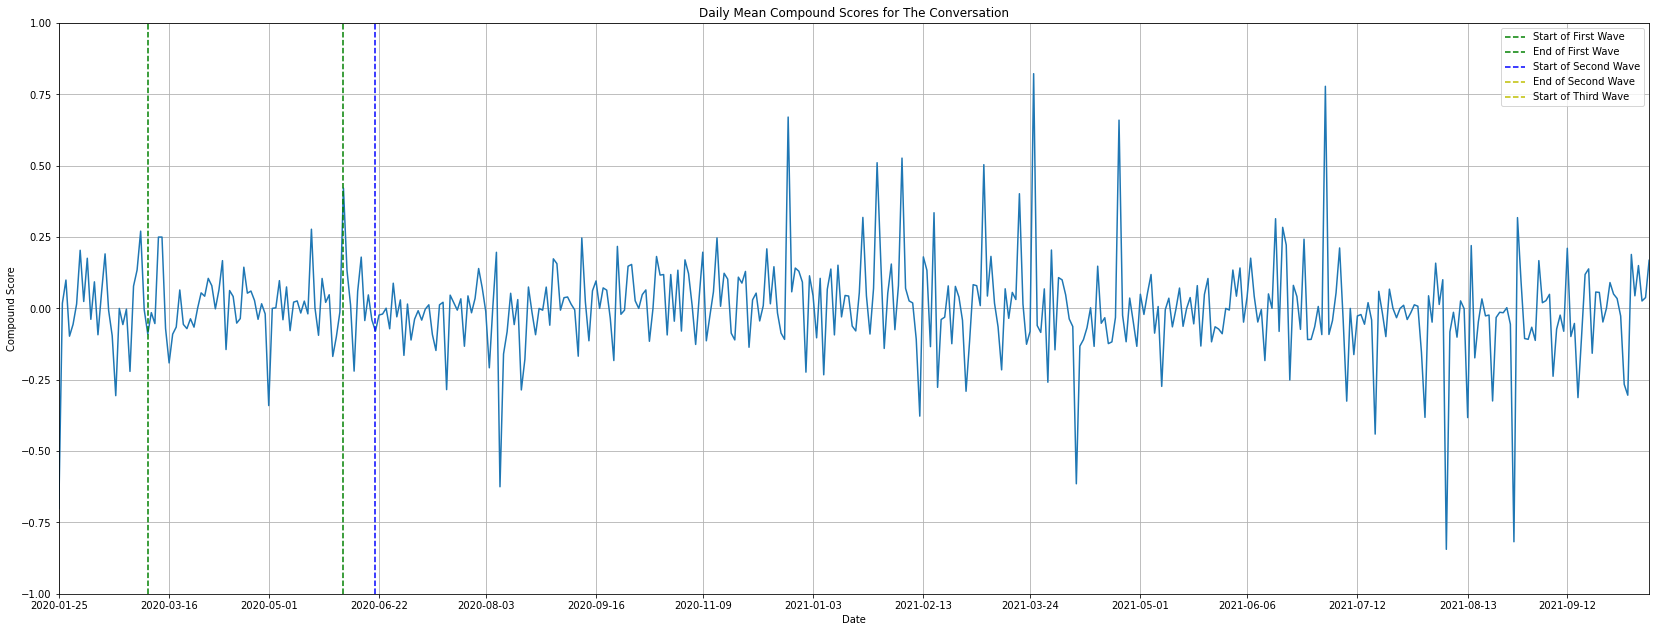

In [172]:
import numpy as np
import pandas as pd 
import nltk
from nltk.stem import PorterStemmer
from nltk.util import ngrams
from nltk import pos_tag
from nltk import RegexpParser
import fileinput
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import csv
import re
import matplotlib.pyplot as plt
from matplotlib import rcParams
from datetime import datetime
from collections import Counter
import matplotlib.dates as mdates
import itertools

#Import stop words from nltk.corpus 
stopwords = set(nltk.corpus.stopwords.words('english'))


#Add additional stopwords manualy 
for word in ["its", "would", "us", "then", "so", "it", "thats", "going", "also", "get", "one", 'im','make', 'said','look','able','done','sure','think', 'way', 'go', 'know','got','time','ive','things','well','like','dont','say','right','theyre','first','two','come','every','making','put','want','hes']:
    stopwords.add(word)


df5 = pd.read_csv('conversation2.csv')
df5.sort_values(["Date2"], inplace=True)

df5["Titles"]= df5["Titles"].str.lower()

df5["Titles"] = df5["Titles"].apply(lambda x: " ".join([re.sub(r'[^\w\d]','', item.lower()) for item in x.split() if re.sub(r'[^\w\d]','', item.lower()) not in stopwords]))

df5['scores'] = df5['Titles'].apply(lambda review: sid.polarity_scores(review))

df5['compound']  = df5['scores'].apply(lambda score_dict: score_dict['compound'])

df5['comp_score'] = df5['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

df5['Date2'] = df5['Date2'].astype(str)

df5['Date2'] = df5['Date2'].apply(lambda x: datetime.strptime(x, '%Y%m%d').strftime('%Y-%m-%d'))


df5 = df5.groupby('Date2').compound.mean()

df5 = df5.reset_index()



x5 = df5['Date2'].values
y5 = df5['compound'].values


fig, ax = plt.subplots(figsize=(28.5, 10.5))

plt.plot(x5,y5)

# plt.plot(df2['Date2'],df2['compound'])

ax.set(xlabel="Date",
       ylabel="Compound Score",
       title="Daily Mean Compound Scores for The Conversation",
       xlim=["2020-01-25", "2021-10-09"])

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))



plt.axvline(x='2020-03-10', color = 'g',label='Start of First Wave',linestyle='--')

plt.axvline(x='2020-06-06' ,color = 'g', label='End of First Wave', linestyle='--')

plt.axvline(x='2020-06-20', color = 'b',  label='Start of Second Wave', linestyle='--')

plt.axvline(x='2020-10-26', color = 'y',  label='End of Second Wave', linestyle='--')

plt.axvline(x='2021-06-18', color = 'y',  label='Start of Third Wave', linestyle='--')

plt.grid(True)


plt.ylim(-1,1)



plt.legend(loc=1); 

plt.show()

In [1]:
import numpy as np
import pandas as pd 
import nltk
from nltk.stem import PorterStemmer
from nltk.util import ngrams
from nltk import pos_tag
from nltk import RegexpParser
import fileinput
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import csv
import re
import matplotlib.pyplot as plt
from matplotlib import rcParams
from datetime import datetime
from collections import Counter


#Import stop words from nltk.corpus 
stopwords = set(nltk.corpus.stopwords.words('english'))


#Add additional stopwords manualy 
for word in ["its", "would", "us", "then", "so", "it", "thats", "going", "also", "get", "one", 'im','make', 'said','look','able','done','sure','think', 'way', 'go', 'know','got','time','ive','things','well','like','dont','say','right','theyre','first','two','come','every','making','put','want','hes']:
    stopwords.add(word)

#Read File    
df = pd.read_csv('abc2.csv')

df.sort_values(["Date2"], inplace=True)

df["Titles"]= df["Titles"].str.lower()

df["Titles"] = df["Titles"].apply(lambda x: " ".join([re.sub(r'[^\w\d]','', item.lower()) for item in x.split() if re.sub(r'[^\w\d]','', item.lower()) not in stopwords]))

sid = SentimentIntensityAnalyzer()

df['scores'] = df['Titles'].apply(lambda review: sid.polarity_scores(review))

df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])

df['comp_score'] = df['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

df = df.groupby(["Month", "comp_score"]).size().reset_index(name="Count")

df = df.loc[df['comp_score'] == 'neg']

df['Month'] = df['Month'].astype(str)

df['Month'] = df['Month'].apply(lambda x: datetime.strptime(x, '%Y%m').strftime('%Y-%m'))


df

,Month,comp_score,Count
0,2020-01,neg,282
2,2020-02,neg,1214
4,2020-03,neg,1360
6,2020-04,neg,1186
8,2020-05,neg,1341
10,2020-06,neg,1415
12,2020-07,neg,1258
14,2020-08,neg,1474
16,2020-09,neg,1236
18,2020-10,neg,1099


In [1]:
#Most frequent topics from first case to start of first wave
import numpy as np
import pandas as pd 
import nltk
from nltk.stem import PorterStemmer
from nltk.util import ngrams
from nltk import pos_tag
from nltk import RegexpParser
import fileinput
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import csv
import re
import matplotlib.pyplot as plt
from matplotlib import rcParams
from datetime import datetime
from collections import Counter
import matplotlib.dates as mdates
import itertools

#Import stop words from nltk.corpus 
stopwords = set(nltk.corpus.stopwords.words('english'))


#Add additional stopwords manualy 
for word in ["its", "would", "us", "then", "so", "it", "thats", "going", "also", "get", "one", 'im','make', 'said','look','able','done','sure','think', 'way', 'go', 'know','got','time','ive','things','well','like','dont','say','right','theyre','first','two','come','every','making','put','want','hes']:
    stopwords.add(word)

#Read File    
df = pd.read_csv('conversation2.csv')

df.sort_values(["Date2"], inplace=True)

df["Titles"]= df["Titles"].str.lower()

df["Titles"] = df["Titles"].apply(lambda x: " ".join([re.sub(r'[^\w\d]','', item.lower()) for item in x.split() if re.sub(r'[^\w\d]','', item.lower()) not in stopwords]))

sid = SentimentIntensityAnalyzer()

df['scores'] = df['Titles'].apply(lambda review: sid.polarity_scores(review))

df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])

df['comp_score'] = df['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

df['Date2'] = df['Date2'].astype(str)

df['Date2'] = df['Date2'].apply(lambda x: datetime.strptime(x, '%Y%m%d').strftime('%Y-%m-%d'))

df = df[(df['Date2'] >= '2020-01-25') & (df['Date2'] <= '2020-03-10')]

#From data, the count vectorizer creates a vocabulary
from sklearn.feature_extraction.text import CountVectorizer 
count_vect = CountVectorizer(max_df=0.8, min_df=2, stop_words='english')
termmatrix = count_vect.fit_transform(df['Titles'].values.astype('U'))

from sklearn.decomposition import LatentDirichletAllocation

#The Latent Dirichlet Allocation creates ten topics from the word data 
LDA = LatentDirichletAllocation(n_components=5, random_state=42)
LDA.fit(termmatrix)

#Print the top ten words for each topic 
for i,topic in enumerate(LDA.components_):
    print(f'Top 10 words for topic #{i}:')
    print([count_vect.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')
 
topic_values = LDA.transform(termmatrix)
topic_values.shape
df['Topic'] = topic_values.argmax(axis=1)

freq = df['Topic'].value_counts()

# freq
df

Top 10 words for topic #0:
['change', 'different', 'wuhan', 'women', 'use', 'heres', 'help', 'australia', 'people', 'coronavirus']


Top 10 words for topic #1:
['review', 'yes', 'dark', 'crisis', 'better', 'australians', 'help', 'change', 'kids', 'need']


Top 10 words for topic #2:
['mckenzie', 'help', 'economic', 'michelle', 'politics', 'australia', 'world', 'grattan', 'year', 'coronavirus']


Top 10 words for topic #3:
['media', 'lets', 'says', 'bushfire', 'life', 'climate', 'coronavirus', 'friday', 'government', 'australian']


Top 10 words for topic #4:
['death', 'australian', 'grattan', 'michelle', 'video', 'public', 'coronavirus', 'australia', 'heres', 'new']




,Date,Titles,Date2,Month,scores,compound,comp_score,Topic
29,2.020000e+13,scientists hate told australia warned,2020-01-25,202001,"{'neg': 0.659, 'neu': 0.341, 'pos': 0.0, 'comp...",-0.7003,neg,0
27,2.020000e+13,inside story trauma cleaner beautiful meditat...,2020-01-26,202001,"{'neg': 0.522, 'neu': 0.167, 'pos': 0.311, 'co...",-0.5859,neg,4
26,2.020000e+13,found worlds oldest asteroid strike western au...,2020-01-26,202001,"{'neg': 0.13, 'neu': 0.87, 'pos': 0.0, 'compou...",-0.1280,neg,1
25,2.020000e+13,social media less lonely depends use,2020-01-26,202001,"{'neg': 0.306, 'neu': 0.694, 'pos': 0.0, 'comp...",-0.2975,neg,3
24,2.020000e+13,cant need public toilet youre alone theres help,2020-01-26,202001,"{'neg': 0.187, 'neu': 0.561, 'pos': 0.252, 'co...",0.1779,pos,0
...,...,...,...,...,...,...,...,...
435,2.020000e+13,money private schools wont australias educatio...,2020-03-10,202003,"{'neg': 0.0, 'neu': 0.879, 'pos': 0.121, 'comp...",0.0258,pos,2
436,2.020000e+13,denied full participation catholic women mobil...,2020-03-10,202003,"{'neg': 0.326, 'neu': 0.674, 'pos': 0.0, 'comp...",-0.4404,neg,0
437,2.020000e+13,vital signs australian rate cuts underline ser...,2020-03-10,202003,"{'neg': 0.51, 'neu': 0.34, 'pos': 0.15, 'compo...",-0.6486,neg,3
434,2.020000e+13,save furry animals bushfires river creatures ...,2020-03-10,202003,"{'neg': 0.274, 'neu': 0.442, 'pos': 0.283, 'co...",0.0258,pos,1


In [85]:
#Most frequent topics from start of first wave to end of first wave
import numpy as np
import pandas as pd 
import nltk
from nltk.stem import PorterStemmer
from nltk.util import ngrams
from nltk import pos_tag
from nltk import RegexpParser
import fileinput
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import csv
import re
import matplotlib.pyplot as plt
from matplotlib import rcParams
from datetime import datetime
from collections import Counter
import matplotlib.dates as mdates
import itertools

#Import stop words from nltk.corpus 
stopwords = set(nltk.corpus.stopwords.words('english'))


#Add additional stopwords manualy 
for word in ["its", "would", "us", "then", "so", "it", "thats", "going", "also", "get", "one", 'im','make', 'said','look','able','done','sure','think', 'way', 'go', 'know','got','time','ive','things','well','like','dont','say','right','theyre','first','two','come','every','making','put','want','hes']:
    stopwords.add(word)

#Read File    
df = pd.read_csv('conversation2.csv')

df.sort_values(["Date2"], inplace=True)

df["Titles"]= df["Titles"].str.lower()

df["Titles"] = df["Titles"].apply(lambda x: " ".join([re.sub(r'[^\w\d]','', item.lower()) for item in x.split() if re.sub(r'[^\w\d]','', item.lower()) not in stopwords]))

sid = SentimentIntensityAnalyzer()

df['scores'] = df['Titles'].apply(lambda review: sid.polarity_scores(review))

df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])

df['comp_score'] = df['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

df['Date2'] = df['Date2'].astype(str)

df['Date2'] = df['Date2'].apply(lambda x: datetime.strptime(x, '%Y%m%d').strftime('%Y-%m-%d'))

df = df[(df['Date2'] >= '2020-03-10') & (df['Date2'] <= '2020-06-06')]

#From data, the count vectorizer creates a vocabulary
from sklearn.feature_extraction.text import CountVectorizer 
count_vect = CountVectorizer(max_df=0.8, min_df=2, stop_words='english')
termmatrix = count_vect.fit_transform(df['Titles'].values.astype('U'))

from sklearn.decomposition import LatentDirichletAllocation

#The Latent Dirichlet Allocation creates ten topics from the word data 
LDA = LatentDirichletAllocation(n_components=5, random_state=42)
LDA.fit(termmatrix)

#Print the top ten words for each topic 
for i,topic in enumerate(LDA.components_):
    print(f'Top 10 words for topic #{i}:')
    print([count_vect.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')
    

topic_values = LDA.transform(termmatrix)
topic_values.shape
df['Topic'] = topic_values.argmax(axis=1)

freq = df['Topic'].value_counts()

freq

Top 10 words for topic #0:
['zealand', 'covid19', 'australian', 'year', 'pandemic', 'court', 'women', 'australias', 'australia', 'new']


Top 10 words for topic #1:
['help', 'spread', 'australia', 'social', 'new', 'grattan', 'heres', 'people', 'need', 'coronavirus']


Top 10 words for topic #2:
['history', 'pandemic', 'great', 'essay', 'help', 'app', 'wont', 'covid19', 'friday', 'coronavirus']


Top 10 words for topic #3:
['health', 'work', 'zealands', 'crisis', 'home', 'pandemic', 'lockdown', 'australia', 'new', 'coronavirus']


Top 10 words for topic #4:
['ways', 'home', 'youre', 'kids', 'online', 'government', 'pandemic', 'heres', 'covid19', 'coronavirus']




1    284
3    262
4    245
2    161
0    145
Name: Topic, dtype: int64

In [86]:
#Most frequent topics from end of first wave to start of second wave
import numpy as np
import pandas as pd 
import nltk
from nltk.stem import PorterStemmer
from nltk.util import ngrams
from nltk import pos_tag
from nltk import RegexpParser
import fileinput
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import csv
import re
import matplotlib.pyplot as plt
from matplotlib import rcParams
from datetime import datetime
from collections import Counter
import matplotlib.dates as mdates
import itertools

#Import stop words from nltk.corpus 
stopwords = set(nltk.corpus.stopwords.words('english'))


#Add additional stopwords manualy 
for word in ["its", "would", "us", "then", "so", "it", "thats", "going", "also", "get", "one", 'im','make', 'said','look','able','done','sure','think', 'way', 'go', 'know','got','time','ive','things','well','like','dont','say','right','theyre','first','two','come','every','making','put','want','hes']:
    stopwords.add(word)

#Read File    
df = pd.read_csv('conversation2.csv')

df.sort_values(["Date2"], inplace=True)

df["Titles"]= df["Titles"].str.lower()

df["Titles"] = df["Titles"].apply(lambda x: " ".join([re.sub(r'[^\w\d]','', item.lower()) for item in x.split() if re.sub(r'[^\w\d]','', item.lower()) not in stopwords]))

sid = SentimentIntensityAnalyzer()

df['scores'] = df['Titles'].apply(lambda review: sid.polarity_scores(review))

df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])

df['comp_score'] = df['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

df['Date2'] = df['Date2'].astype(str)

df['Date2'] = df['Date2'].apply(lambda x: datetime.strptime(x, '%Y%m%d').strftime('%Y-%m-%d'))

df = df[(df['Date2'] >= '2020-06-06') & (df['Date2'] <= '2020-06-20')]

#From data, the count vectorizer creates a vocabulary
from sklearn.feature_extraction.text import CountVectorizer 
count_vect = CountVectorizer(max_df=0.8, min_df=2, stop_words='english')
termmatrix = count_vect.fit_transform(df['Titles'].values.astype('U'))

from sklearn.decomposition import LatentDirichletAllocation

#The Latent Dirichlet Allocation creates ten topics from the word data 
LDA = LatentDirichletAllocation(n_components=5, random_state=42)
LDA.fit(termmatrix)

#Print the top ten words for each topic 
for i,topic in enumerate(LDA.components_):
    print(f'Top 10 words for topic #{i}:')
    print([count_vect.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

topic_values = LDA.transform(termmatrix)
topic_values.shape
df['Topic'] = topic_values.argmax(axis=1)

freq = df['Topic'].value_counts()

freq

Top 10 words for topic #0:
['relations', 'international', 'test', 'work', 'australias', 'morrison', 'curious', 'world', 'big', 'kids']


Top 10 words for topic #1:
['zealand', 'use', 'police', 'australias', 'ways', 'government', 'health', 'coronavirus', 'new', 'australia']


Top 10 words for topic #2:
['australian', 'lives', 'black', 'indigenous', 'gas', 'tear', 'coronavirus', 'matter', 'need', 'australians']


Top 10 words for topic #3:
['protests', 'people', 'coronavirus', 'michelle', 'captain', 'cook', 'heres', 'indigenous', 'australia', 'grattan']


Top 10 words for topic #4:
['businesses', 'politics', 'covid19', 'help', 'protect', 'lockdown', 'new', 'essay', 'friday', 'pandemic']




3    58
1    51
2    42
0    37
4    23
Name: Topic, dtype: int64

In [87]:
#Most frequent topics from start of second wave to end of second wave
import numpy as np
import pandas as pd 
import nltk
from nltk.stem import PorterStemmer
from nltk.util import ngrams
from nltk import pos_tag
from nltk import RegexpParser
import fileinput
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import csv
import re
import matplotlib.pyplot as plt
from matplotlib import rcParams
from datetime import datetime
from collections import Counter
import matplotlib.dates as mdates
import itertools

#Import stop words from nltk.corpus 
stopwords = set(nltk.corpus.stopwords.words('english'))


#Add additional stopwords manualy 
for word in ["its", "would", "us", "then", "so", "it", "thats", "going", "also", "get", "one", 'im','make', 'said','look','able','done','sure','think', 'way', 'go', 'know','got','time','ive','things','well','like','dont','say','right','theyre','first','two','come','every','making','put','want','hes']:
    stopwords.add(word)

#Read File    
df = pd.read_csv('conversation2.csv')

df.sort_values(["Date2"], inplace=True)

df["Titles"]= df["Titles"].str.lower()

df["Titles"] = df["Titles"].apply(lambda x: " ".join([re.sub(r'[^\w\d]','', item.lower()) for item in x.split() if re.sub(r'[^\w\d]','', item.lower()) not in stopwords]))

sid = SentimentIntensityAnalyzer()

df['scores'] = df['Titles'].apply(lambda review: sid.polarity_scores(review))

df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])

df['comp_score'] = df['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

df['Date2'] = df['Date2'].astype(str)

df['Date2'] = df['Date2'].apply(lambda x: datetime.strptime(x, '%Y%m%d').strftime('%Y-%m-%d'))

df = df[(df['Date2'] >= '2020-06-06') & (df['Date2'] <= '2020-10-26')]

#From data, the count vectorizer creates a vocabulary
from sklearn.feature_extraction.text import CountVectorizer 
count_vect = CountVectorizer(max_df=0.8, min_df=2, stop_words='english')
termmatrix = count_vect.fit_transform(df['Titles'].values.astype('U'))

from sklearn.decomposition import LatentDirichletAllocation

#The Latent Dirichlet Allocation creates ten topics from the word data 
LDA = LatentDirichletAllocation(n_components=5, random_state=42)
LDA.fit(termmatrix)

#Print the top ten words for each topic 
for i,topic in enumerate(LDA.components_):
    print(f'Top 10 words for topic #{i}:')
    print([count_vect.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')
    
 
topic_values = LDA.transform(termmatrix)
topic_values.shape
df['Topic'] = topic_values.argmax(axis=1)

freq = df['Topic'].value_counts()

freq

Top 10 words for topic #0:
['world', 'australian', 'lockdown', 'pandemic', 'australias', 'zealand', 'health', 'coronavirus', 'covid19', 'new']


Top 10 words for topic #1:
['coronavirus', '10', 'curious', 'covid', 'indigenous', 'grattan', 'australia', 'politics', 'kids', 'new']


Top 10 words for topic #2:
['signs', 'video', 'government', 'vital', 'morrison', 'change', 'michelle', 'need', 'friday', 'grattan']


Top 10 words for topic #3:
['better', 'university', 'government', 'world', 'coronavirus', 'new', 'governments', 'heres', 'australia', 'covid19']


Top 10 words for topic #4:
['mask', 'people', 'work', 'election', 'life', 'lockdown', 'heres', 'australia', 'covid19', 'coronavirus']




0    466
2    337
4    318
3    307
1    298
Name: Topic, dtype: int64

In [88]:
#Most frequent topics from end of second wave to start of third wave
import numpy as np
import pandas as pd 
import nltk
from nltk.stem import PorterStemmer
from nltk.util import ngrams
from nltk import pos_tag
from nltk import RegexpParser
import fileinput
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import csv
import re
import matplotlib.pyplot as plt
from matplotlib import rcParams
from datetime import datetime
from collections import Counter
import matplotlib.dates as mdates
import itertools

#Import stop words from nltk.corpus 
stopwords = set(nltk.corpus.stopwords.words('english'))


#Add additional stopwords manualy 
for word in ["its", "would", "us", "then", "so", "it", "thats", "going", "also", "get", "one", 'im','make', 'said','look','able','done','sure','think', 'way', 'go', 'know','got','time','ive','things','well','like','dont','say','right','theyre','first','two','come','every','making','put','want','hes']:
    stopwords.add(word)

#Read File    
df = pd.read_csv('conversation2.csv')

df.sort_values(["Date2"], inplace=True)

df["Titles"]= df["Titles"].str.lower()

df["Titles"] = df["Titles"].apply(lambda x: " ".join([re.sub(r'[^\w\d]','', item.lower()) for item in x.split() if re.sub(r'[^\w\d]','', item.lower()) not in stopwords]))

sid = SentimentIntensityAnalyzer()

df['scores'] = df['Titles'].apply(lambda review: sid.polarity_scores(review))

df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])

df['comp_score'] = df['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

df['Date2'] = df['Date2'].astype(str)

df['Date2'] = df['Date2'].apply(lambda x: datetime.strptime(x, '%Y%m%d').strftime('%Y-%m-%d'))

df = df[(df['Date2'] >= '2020-10-26') & (df['Date2'] <= '2021-06-18')]

#From data, the count vectorizer creates a vocabulary
from sklearn.feature_extraction.text import CountVectorizer 
count_vect = CountVectorizer(max_df=0.8, min_df=2, stop_words='english')
termmatrix = count_vect.fit_transform(df['Titles'].values.astype('U'))

from sklearn.decomposition import LatentDirichletAllocation

#The Latent Dirichlet Allocation creates ten topics from the word data 
LDA = LatentDirichletAllocation(n_components=5, random_state=42)
LDA.fit(termmatrix)

#Print the top ten words for each topic 
for i,topic in enumerate(LDA.components_):
    print(f'Top 10 words for topic #{i}:')
    print([count_vect.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')
    
 
topic_values = LDA.transform(termmatrix)
topic_values.shape
df['Topic'] = topic_values.argmax(axis=1)

freq = df['Topic'].value_counts()

freq

Top 10 words for topic #0:
['australian', 'help', 'climate', 'people', 'heres', 'vaccines', 'covid19', 'new', 'vaccine', 'covid']


Top 10 words for topic #1:
['government', 'evidence', 'kids', 'heres', 'need', 'covid', 'australias', 'vaccine', 'australia', 'new']


Top 10 words for topic #2:
['morrison', 'australia', 'white', 'australias', 'big', 'good', 'view', 'hill', 'climate', 'new']


Top 10 words for topic #3:
['help', 'vital', 'need', 'politics', 'grattan', 'care', 'new', 'climate', 'australian', 'australia']


Top 10 words for topic #4:
['people', 'scott', 'michelle', 'essay', 'change', 'covid', 'ways', 'australia', 'friday', 'grattan']




1    611
0    610
3    580
2    523
4    516
Name: Topic, dtype: int64

In [89]:
#Most frequent topics from start of third wave to end of dataset
import numpy as np
import pandas as pd 
import nltk
from nltk.stem import PorterStemmer
from nltk.util import ngrams
from nltk import pos_tag
from nltk import RegexpParser
import fileinput
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import csv
import re
import matplotlib.pyplot as plt
from matplotlib import rcParams
from datetime import datetime
from collections import Counter
import matplotlib.dates as mdates
import itertools

#Import stop words from nltk.corpus 
stopwords = set(nltk.corpus.stopwords.words('english'))


#Add additional stopwords manualy 
for word in ["its", "would", "us", "then", "so", "it", "thats", "going", "also", "get", "one", 'im','make', 'said','look','able','done','sure','think', 'way', 'go', 'know','got','time','ive','things','well','like','dont','say','right','theyre','first','two','come','every','making','put','want','hes']:
    stopwords.add(word)

#Read File    
df = pd.read_csv('conversation2.csv')

df.sort_values(["Date2"], inplace=True)

df["Titles"]= df["Titles"].str.lower()

df["Titles"] = df["Titles"].apply(lambda x: " ".join([re.sub(r'[^\w\d]','', item.lower()) for item in x.split() if re.sub(r'[^\w\d]','', item.lower()) not in stopwords]))

sid = SentimentIntensityAnalyzer()

df['scores'] = df['Titles'].apply(lambda review: sid.polarity_scores(review))

df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])

df['comp_score'] = df['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

df['Date2'] = df['Date2'].astype(str)

df['Date2'] = df['Date2'].apply(lambda x: datetime.strptime(x, '%Y%m%d').strftime('%Y-%m-%d'))

df = df[(df['Date2'] >= '2021-06-18') & (df['Date2'] <= '2021-10-09')]

#From data, the count vectorizer creates a vocabulary
from sklearn.feature_extraction.text import CountVectorizer 
count_vect = CountVectorizer(max_df=0.8, min_df=2, stop_words='english')
termmatrix = count_vect.fit_transform(df['Titles'].values.astype('U'))

from sklearn.decomposition import LatentDirichletAllocation

#The Latent Dirichlet Allocation creates ten topics from the word data 
LDA = LatentDirichletAllocation(n_components=5, random_state=42)
LDA.fit(termmatrix)

#Print the top ten words for each topic 
for i,topic in enumerate(LDA.components_):
    print(f'Top 10 words for topic #{i}:')
    print([count_vect.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')
    
  
topic_values = LDA.transform(termmatrix)
topic_values.shape
df['Topic'] = topic_values.argmax(axis=1)

freq = df['Topic'].value_counts()

freq

Top 10 words for topic #0:
['government', 'nsw', 'grattan', 'taliban', 'years', 'heres', 'australia', 'need', 'afghanistan', 'covid']


Top 10 words for topic #1:
['government', 'australian', 'heres', 'astrazeneca', 'australia', 'australias', 'need', 'friday', 'covid', 'vaccine']


Top 10 words for topic #2:
['lockdown', 'people', 'covid19', 'work', 'health', 'olympics', 'australias', 'covid', 'climate', 'change']


Top 10 words for topic #3:
['need', 'australia', 'view', 'hill', 'politics', 'new', 'covid', 'pandemic', 'michelle', 'grattan']


Top 10 words for topic #4:
['vaccination', 'home', 'help', 'research', 'australian', 'heres', 'zealand', 'covid', 'australia', 'new']




2    375
3    358
4    354
1    293
0    287
Name: Topic, dtype: int64

In [157]:
#Most frequent words from first case to start of first wave
import numpy as np
import pandas as pd 
import nltk
from nltk.stem import PorterStemmer
from nltk.util import ngrams
from nltk import pos_tag
from nltk import RegexpParser
import fileinput
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import csv
import re
import matplotlib.pyplot as plt
from matplotlib import rcParams
from datetime import datetime
from collections import Counter
import matplotlib.dates as mdates
import itertools
from keras.preprocessing.text import Tokenizer
from operator import itemgetter

#Import stop words from nltk.corpus 
stopwords = set(nltk.corpus.stopwords.words('english'))


#Add additional stopwords manualy 
for word in ["its", "would", "us", "then", "so", "it", "thats", "going", "also", "get", "one", 'im','make', 'said','look','able','done','sure','think', 'way', 'go', 'know','got','time','ive','things','well','like','dont','say','right','theyre','first','two','come','every','making','put','want','hes']:
    stopwords.add(word)

#Read File    
df = pd.read_csv('conversation2.csv')

df.sort_values(["Date2"], inplace=True)

df["Titles"]= df["Titles"].str.lower()

df["Titles"] = df["Titles"].apply(lambda x: " ".join([re.sub(r'[^\w\d]','', item.lower()) for item in x.split() if re.sub(r'[^\w\d]','', item.lower()) not in stopwords]))

sid = SentimentIntensityAnalyzer()

df['scores'] = df['Titles'].apply(lambda review: sid.polarity_scores(review))

df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])

df['comp_score'] = df['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

df['Date2'] = df['Date2'].astype(str)

df['Date2'] = df['Date2'].apply(lambda x: datetime.strptime(x, '%Y%m%d').strftime('%Y-%m-%d'))

df = df[(df['Date2'] >= '2020-01-25') & (df['Date2'] <= '2020-03-10')]

t = Tokenizer()
t.fit_on_texts(df.Titles)
topwords = sorted(t.word_counts.items(), key=itemgetter(1), reverse=True)[:12]
topwords

# meancompoundscore = df.compound.mean()

# meancompoundscore

df['comp_score'].value_counts()



pos    304
neg    149
Name: comp_score, dtype: int64

In [159]:
#Most frequent words from start of first wave to end of first wave
import numpy as np
import pandas as pd 
import nltk
from nltk.stem import PorterStemmer
from nltk.util import ngrams
from nltk import pos_tag
from nltk import RegexpParser
import fileinput
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import csv
import re
import matplotlib.pyplot as plt
from matplotlib import rcParams
from datetime import datetime
from collections import Counter
import matplotlib.dates as mdates
import itertools
from keras.preprocessing.text import Tokenizer
from operator import itemgetter

#Import stop words from nltk.corpus 
stopwords = set(nltk.corpus.stopwords.words('english'))


#Add additional stopwords manualy 
for word in ["its", "would", "us", "then", "so", "it", "thats", "going", "also", "get", "one", 'im','make', 'said','look','able','done','sure','think', 'way', 'go', 'know','got','time','ive','things','well','like','dont','say','right','theyre','first','two','come','every','making','put','want','hes']:
    stopwords.add(word)

#Read File    
df = pd.read_csv('conversation2.csv')

df.sort_values(["Date2"], inplace=True)

df["Titles"]= df["Titles"].str.lower()

df["Titles"] = df["Titles"].apply(lambda x: " ".join([re.sub(r'[^\w\d]','', item.lower()) for item in x.split() if re.sub(r'[^\w\d]','', item.lower()) not in stopwords]))

sid = SentimentIntensityAnalyzer()

df['scores'] = df['Titles'].apply(lambda review: sid.polarity_scores(review))

df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])

df['comp_score'] = df['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

df['Date2'] = df['Date2'].astype(str)

df['Date2'] = df['Date2'].apply(lambda x: datetime.strptime(x, '%Y%m%d').strftime('%Y-%m-%d'))

df = df[(df['Date2'] >= '2020-03-10') & (df['Date2'] <= '2020-06-06')]

t = Tokenizer()
t.fit_on_texts(df.Titles)
topwords = sorted(t.word_counts.items(), key=itemgetter(1), reverse=True)[:12]
topwords

# meancompoundscore = df.compound.mean()

# meancompoundscore

df['comp_score'].value_counts()

pos    711
neg    386
Name: comp_score, dtype: int64

In [161]:
#Most frequent words from end of first wave to start of second wave
import numpy as np
import pandas as pd 
import nltk
from nltk.stem import PorterStemmer
from nltk.util import ngrams
from nltk import pos_tag
from nltk import RegexpParser
import fileinput
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import csv
import re
import matplotlib.pyplot as plt
from matplotlib import rcParams
from datetime import datetime
from collections import Counter
import matplotlib.dates as mdates
import itertools
from keras.preprocessing.text import Tokenizer
from operator import itemgetter

#Import stop words from nltk.corpus 
stopwords = set(nltk.corpus.stopwords.words('english'))


#Add additional stopwords manualy 
for word in ["its", "would", "us", "then", "so", "it", "thats", "going", "also", "get", "one", 'im','make', 'said','look','able','done','sure','think', 'way', 'go', 'know','got','time','ive','things','well','like','dont','say','right','theyre','first','two','come','every','making','put','want','hes']:
    stopwords.add(word)

#Read File    
df = pd.read_csv('conversation2.csv')

df.sort_values(["Date2"], inplace=True)

df["Titles"]= df["Titles"].str.lower()

df["Titles"] = df["Titles"].apply(lambda x: " ".join([re.sub(r'[^\w\d]','', item.lower()) for item in x.split() if re.sub(r'[^\w\d]','', item.lower()) not in stopwords]))

sid = SentimentIntensityAnalyzer()

df['scores'] = df['Titles'].apply(lambda review: sid.polarity_scores(review))

df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])

df['comp_score'] = df['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

df['Date2'] = df['Date2'].astype(str)

df['Date2'] = df['Date2'].apply(lambda x: datetime.strptime(x, '%Y%m%d').strftime('%Y-%m-%d'))

df = df[(df['Date2'] >= '2020-06-06') & (df['Date2'] <= '2020-06-20')]

t = Tokenizer()
t.fit_on_texts(df.Titles)
topwords = sorted(t.word_counts.items(), key=itemgetter(1), reverse=True)[:12]
topwords

# meancompoundscore = df.compound.mean()

# meancompoundscore

df['comp_score'].value_counts()

pos    143
neg     68
Name: comp_score, dtype: int64

In [163]:
#Most frequent words from start of second wave to end of second wave
import numpy as np
import pandas as pd 
import nltk
from nltk.stem import PorterStemmer
from nltk.util import ngrams
from nltk import pos_tag
from nltk import RegexpParser
import fileinput
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import csv
import re
import matplotlib.pyplot as plt
from matplotlib import rcParams
from datetime import datetime
from collections import Counter
import matplotlib.dates as mdates
import itertools
from keras.preprocessing.text import Tokenizer
from operator import itemgetter

#Import stop words from nltk.corpus 
stopwords = set(nltk.corpus.stopwords.words('english'))


#Add additional stopwords manualy 
for word in ["its", "would", "us", "then", "so", "it", "thats", "going", "also", "get", "one", 'im','make', 'said','look','able','done','sure','think', 'way', 'go', 'know','got','time','ive','things','well','like','dont','say','right','theyre','first','two','come','every','making','put','want','hes']:
    stopwords.add(word)

#Read File    
df = pd.read_csv('conversation2.csv')

df.sort_values(["Date2"], inplace=True)

df["Titles"]= df["Titles"].str.lower()

df["Titles"] = df["Titles"].apply(lambda x: " ".join([re.sub(r'[^\w\d]','', item.lower()) for item in x.split() if re.sub(r'[^\w\d]','', item.lower()) not in stopwords]))

sid = SentimentIntensityAnalyzer()

df['scores'] = df['Titles'].apply(lambda review: sid.polarity_scores(review))

df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])

df['comp_score'] = df['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

df['Date2'] = df['Date2'].astype(str)

df['Date2'] = df['Date2'].apply(lambda x: datetime.strptime(x, '%Y%m%d').strftime('%Y-%m-%d'))

df = df[(df['Date2'] >= '2020-06-20') & (df['Date2'] <= '2020-10-26')]

t = Tokenizer()
t.fit_on_texts(df.Titles)
topwords = sorted(t.word_counts.items(), key=itemgetter(1), reverse=True)[:12]
topwords

# meancompoundscore = df.compound.mean()

# meancompoundscore

df['comp_score'].value_counts()


pos    1027
neg     531
Name: comp_score, dtype: int64

In [165]:
#Most frequent words from end of second wave to start of third wave
import numpy as np
import pandas as pd 
import nltk
from nltk.stem import PorterStemmer
from nltk.util import ngrams
from nltk import pos_tag
from nltk import RegexpParser
import fileinput
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import csv
import re
import matplotlib.pyplot as plt
from matplotlib import rcParams
from datetime import datetime
from collections import Counter
import matplotlib.dates as mdates
import itertools
from keras.preprocessing.text import Tokenizer
from operator import itemgetter

#Import stop words from nltk.corpus 
stopwords = set(nltk.corpus.stopwords.words('english'))


#Add additional stopwords manualy 
for word in ["its", "would", "us", "then", "so", "it", "thats", "going", "also", "get", "one", 'im','make', 'said','look','able','done','sure','think', 'way', 'go', 'know','got','time','ive','things','well','like','dont','say','right','theyre','first','two','come','every','making','put','want','hes']:
    stopwords.add(word)

#Read File    
df = pd.read_csv('conversation2.csv')

df.sort_values(["Date2"], inplace=True)

df["Titles"]= df["Titles"].str.lower()

df["Titles"] = df["Titles"].apply(lambda x: " ".join([re.sub(r'[^\w\d]','', item.lower()) for item in x.split() if re.sub(r'[^\w\d]','', item.lower()) not in stopwords]))

sid = SentimentIntensityAnalyzer()

df['scores'] = df['Titles'].apply(lambda review: sid.polarity_scores(review))

df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])

df['comp_score'] = df['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

df['Date2'] = df['Date2'].astype(str)

df['Date2'] = df['Date2'].apply(lambda x: datetime.strptime(x, '%Y%m%d').strftime('%Y-%m-%d'))

df = df[(df['Date2'] >= '2020-10-26') & (df['Date2'] <= '2021-06-18')]

t = Tokenizer()
t.fit_on_texts(df.Titles)
topwords = sorted(t.word_counts.items(), key=itemgetter(1), reverse=True)[:12]
topwords

# meancompoundscore = df.compound.mean()

# meancompoundscore

df['comp_score'].value_counts()

pos    1870
neg     970
Name: comp_score, dtype: int64

In [167]:
#Most frequent words from start of third wave to end of dataset
import numpy as np
import pandas as pd 
import nltk
from nltk.stem import PorterStemmer
from nltk.util import ngrams
from nltk import pos_tag
from nltk import RegexpParser
import fileinput
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import csv
import re
import matplotlib.pyplot as plt
from matplotlib import rcParams
from datetime import datetime
from collections import Counter
import matplotlib.dates as mdates
import itertools
from keras.preprocessing.text import Tokenizer
from operator import itemgetter

#Import stop words from nltk.corpus 
stopwords = set(nltk.corpus.stopwords.words('english'))


#Add additional stopwords manualy 
for word in ["its", "would", "us", "then", "so", "it", "thats", "going", "also", "get", "one", 'im','make', 'said','look','able','done','sure','think', 'way', 'go', 'know','got','time','ive','says','things','well','like','dont','say','right','theyre','first','two','come','every','making','put','want','hes']:
    stopwords.add(word)

#Read File    
df = pd.read_csv('conversation2.csv')

df.sort_values(["Date2"], inplace=True)

df["Titles"]= df["Titles"].str.lower()

df["Titles"] = df["Titles"].apply(lambda x: " ".join([re.sub(r'[^\w\d]','', item.lower()) for item in x.split() if re.sub(r'[^\w\d]','', item.lower()) not in stopwords]))

sid = SentimentIntensityAnalyzer()

df['scores'] = df['Titles'].apply(lambda review: sid.polarity_scores(review))

df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])

df['comp_score'] = df['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

df['Date2'] = df['Date2'].astype(str)

df['Date2'] = df['Date2'].apply(lambda x: datetime.strptime(x, '%Y%m%d').strftime('%Y-%m-%d'))

df = df[(df['Date2'] >= '2021-06-18') & (df['Date2'] <= '2021-10-09')]

t = Tokenizer()
t.fit_on_texts(df.Titles)
topwords = sorted(t.word_counts.items(), key=itemgetter(1), reverse=True)[:12]
topwords

# meancompoundscore = df.compound.mean()

# meancompoundscore

df['comp_score'].value_counts()

pos    1119
neg     548
Name: comp_score, dtype: int64

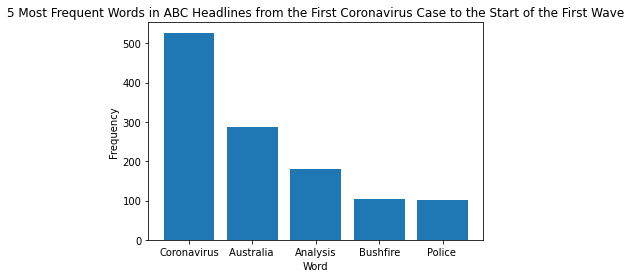

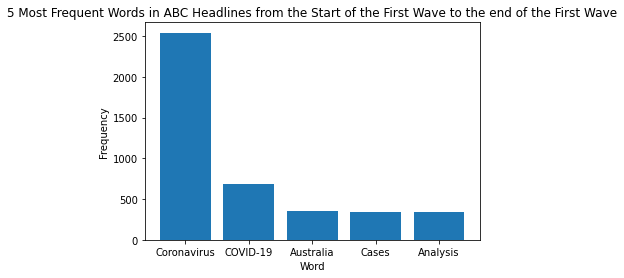

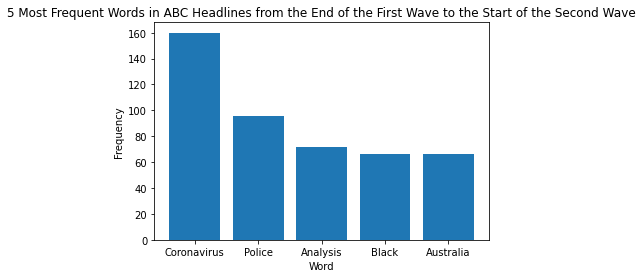

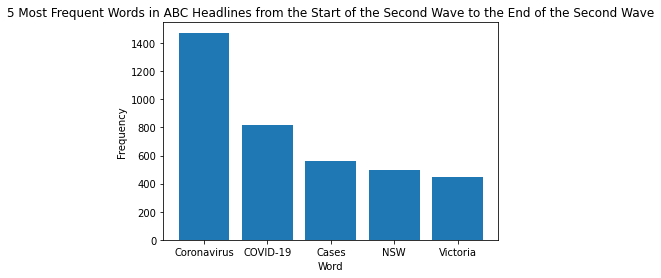

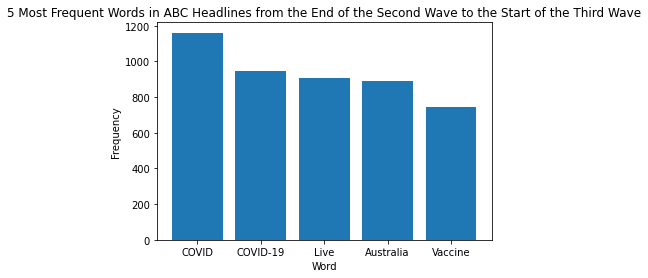

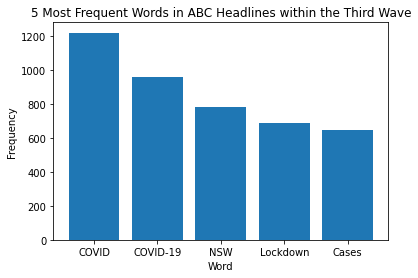

In [43]:
#ABC First Case to First Wave Words
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt




df = pd.read_csv('ABCGraphs2.csv')

fig = plt.figure()

x1 = df['Word1']
y1= df['WordFrequency1']

plt.title("5 Most Frequent Words in ABC Headlines from the First Coronavirus Case to the Start of the First Wave")

plt.xlabel("Word")

plt.ylabel("Frequency")



plt.bar(x1,y1)
plt.show()




x2 = df['Word2']
y2= df['WordFrequency2']

plt.title("5 Most Frequent Words in ABC Headlines from the Start of the First Wave to the end of the First Wave")

plt.xlabel("Word")

plt.ylabel("Frequency")



plt.bar(x2,y2)
plt.show()

x3 = df['Word3']
y3= df['WordFrequency3']

plt.title("5 Most Frequent Words in ABC Headlines from the End of the First Wave to the Start of the Second Wave")

plt.xlabel("Word")

plt.ylabel("Frequency")



plt.bar(x3,y3)
plt.show()

x4 = df['Word4']
y4= df['WordFrequency4']

plt.title("5 Most Frequent Words in ABC Headlines from the Start of the Second Wave to the End of the Second Wave")

plt.xlabel("Word")

plt.ylabel("Frequency")



plt.bar(x4,y4)
plt.show()


x5 = df['Word5']
y5= df['WordFrequency5']

plt.title("5 Most Frequent Words in ABC Headlines from the End of the Second Wave to the Start of the Third Wave")

plt.xlabel("Word")

plt.ylabel("Frequency")



plt.bar(x5,y5)
plt.show()

x6 = df['Word6']
y6 = df['WordFrequency6']

plt.title("5 Most Frequent Words in ABC Headlines within the Third Wave")

plt.xlabel("Word")

plt.ylabel("Frequency")



plt.bar(x6,y6)
plt.show()






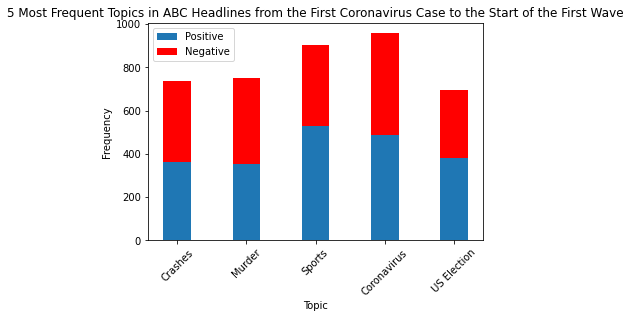

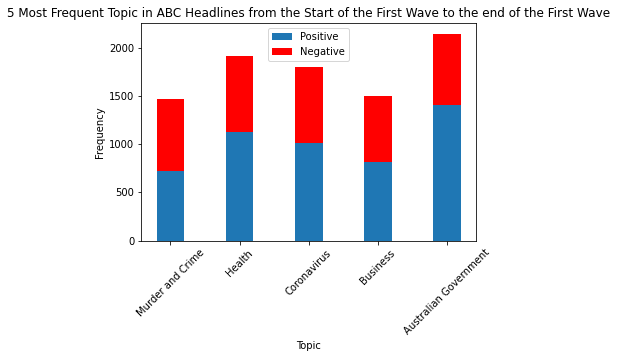

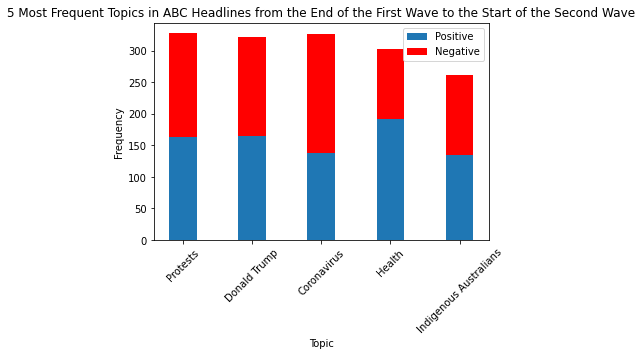

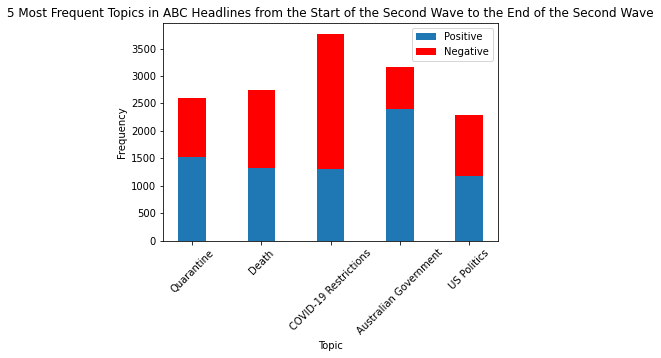

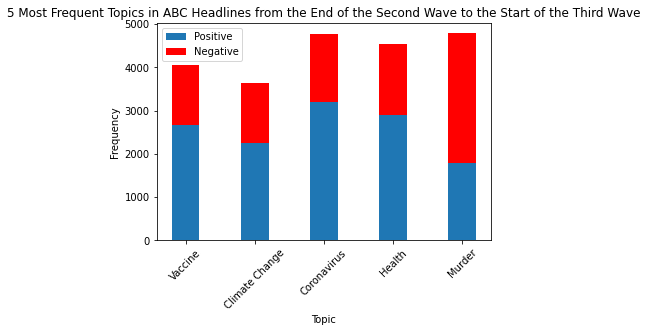

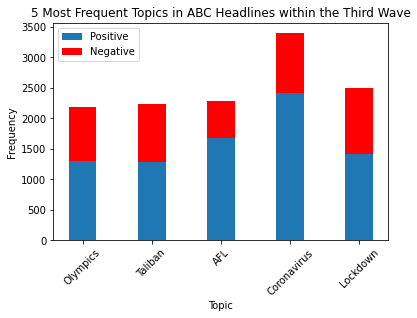

In [54]:
#ABC First Case to First Wave Topics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt




df = pd.read_csv('ABCGraphs3.csv')

fig = plt.figure()

x1 = df['Topic1']
y1= df['TopicFrequency1']
z1 = df['Positive1']
w1 = df['Negative1']


plt.title("5 Most Frequent Topics in ABC Headlines from the First Coronavirus Case to the Start of the First Wave")

plt.xlabel("Topic")

plt.ylabel("Frequency")

plt.xticks(rotation=45)

plt.bar(x1,z1,0.4,label="Positive")
plt.bar(x1,w1,0.4,bottom=z1,label="Negative", color='red')
plt.legend()
plt.show()




x2 = df['Topic2']
y2= df['TopicFrequency2']
z2 = df['Positive2']
w2 = df['Negative2']

plt.title("5 Most Frequent Topic in ABC Headlines from the Start of the First Wave to the end of the First Wave")

plt.xlabel("Topic")

plt.ylabel("Frequency")

plt.xticks(rotation=45)

plt.bar(x2,z2,0.4,label="Positive")
plt.bar(x2,w2,0.4,bottom=z2,label="Negative", color='red')
plt.legend()
plt.show()

x3 = df['Topic3']
y3= df['TopicFrequency3']
z3 = df['Positive3']
w3 = df['Negative3']

plt.title("5 Most Frequent Topics in ABC Headlines from the End of the First Wave to the Start of the Second Wave")

plt.xlabel("Topic")

plt.ylabel("Frequency")

plt.xticks(rotation=45)

plt.bar(x3,z3,0.4,label="Positive")
plt.bar(x3,w3,0.4,bottom=z3,label="Negative", color='red')
plt.legend()
plt.show()

x4 = df['Topic4']
y4= df['TopicFrequency4']
z4 = df['Positive4']
w4 = df['Negative4']

plt.title("5 Most Frequent Topics in ABC Headlines from the Start of the Second Wave to the End of the Second Wave")

plt.xlabel("Topic")

plt.ylabel("Frequency")


plt.xticks(rotation=45)
plt.bar(x4,z4,0.4,label="Positive")
plt.bar(x4,w4,0.4,bottom=z4,label="Negative", color='red')
plt.legend()
plt.show()


x5 = df['Topic5']
y5= df['TopicFrequency5']
z5 = df['Positive5']
w5 = df['Negative5']

plt.title("5 Most Frequent Topics in ABC Headlines from the End of the Second Wave to the Start of the Third Wave")

plt.xlabel("Topic")

plt.ylabel("Frequency")


plt.xticks(rotation=45)
plt.bar(x5,z5,0.4,label="Positive")
plt.bar(x5,w5,0.4,bottom=z5,label="Negative", color='red')
plt.legend()
plt.show()

x6 = df['Topic6']
y6 = df['TopicFrequency6']
z6 = df['Positive6']
w6 = df['Negative6']

plt.title("5 Most Frequent Topics in ABC Headlines within the Third Wave")

plt.xlabel("Topic")

plt.ylabel("Frequency")

plt.xticks(rotation=45)

plt.bar(x6,z6,0.4,label="Positive")
plt.bar(x6,w6,0.4,bottom=z6,label="Negative", color='red')
plt.legend()
plt.show()

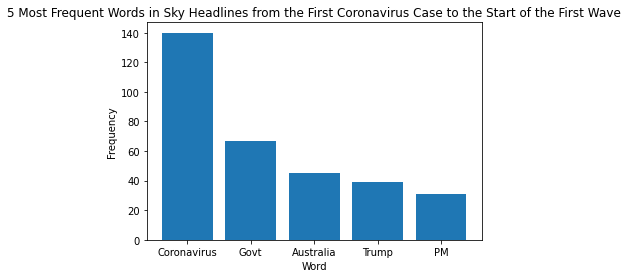

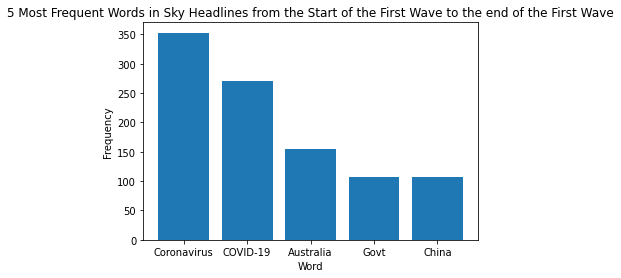

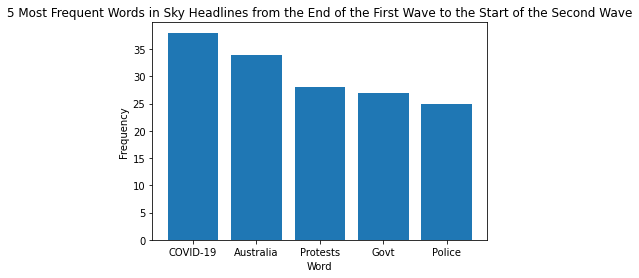

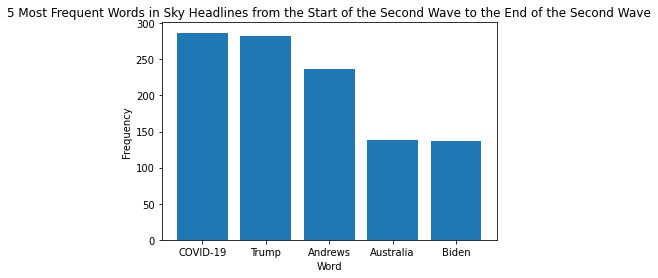

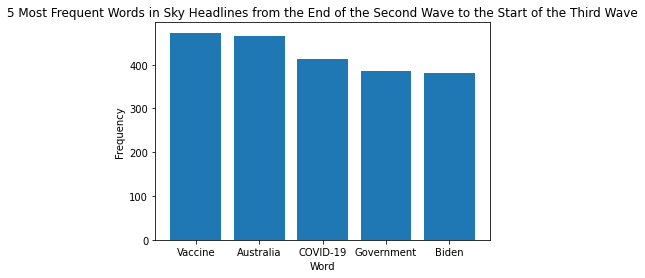

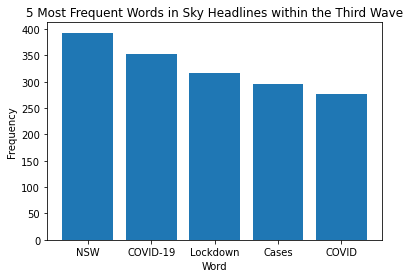

In [112]:
#Sky First Case to First Wave Words
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt




df = pd.read_csv('SkyGraphs.csv')

fig = plt.figure()

x1 = df['Word1']
y1= df['WordFrequency1']

plt.title("5 Most Frequent Words in Sky Headlines from the First Coronavirus Case to the Start of the First Wave")

plt.xlabel("Word")

plt.ylabel("Frequency")



plt.bar(x1,y1)
plt.show()




x2 = df['Word2']
y2= df['WordFrequency2']

plt.title("5 Most Frequent Words in Sky Headlines from the Start of the First Wave to the end of the First Wave")

plt.xlabel("Word")

plt.ylabel("Frequency")



plt.bar(x2,y2)
plt.show()

x3 = df['Word3']
y3= df['WordFrequency3']

plt.title("5 Most Frequent Words in Sky Headlines from the End of the First Wave to the Start of the Second Wave")

plt.xlabel("Word")

plt.ylabel("Frequency")



plt.bar(x3,y3)
plt.show()

x4 = df['Word4']
y4= df['WordFrequency4']

plt.title("5 Most Frequent Words in Sky Headlines from the Start of the Second Wave to the End of the Second Wave")

plt.xlabel("Word")

plt.ylabel("Frequency")



plt.bar(x4,y4)
plt.show()


x5 = df['Word5']
y5= df['WordFrequency5']

plt.title("5 Most Frequent Words in Sky Headlines from the End of the Second Wave to the Start of the Third Wave")

plt.xlabel("Word")

plt.ylabel("Frequency")



plt.bar(x5,y5)
plt.show()

x6 = df['Word6']
y6 = df['WordFrequency6']

plt.title("5 Most Frequent Words in Sky Headlines within the Third Wave")

plt.xlabel("Word")

plt.ylabel("Frequency")



plt.bar(x6,y6)
plt.show()



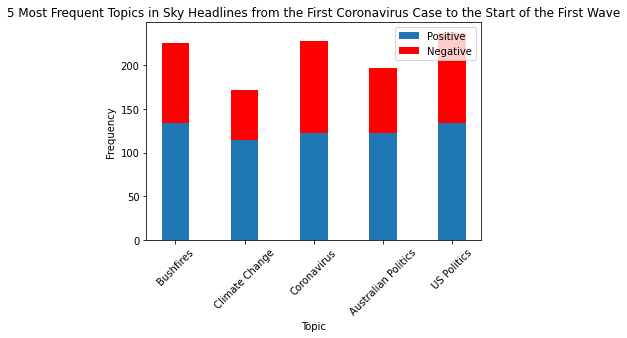

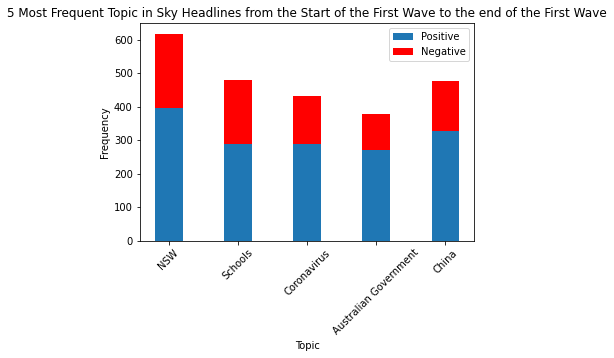

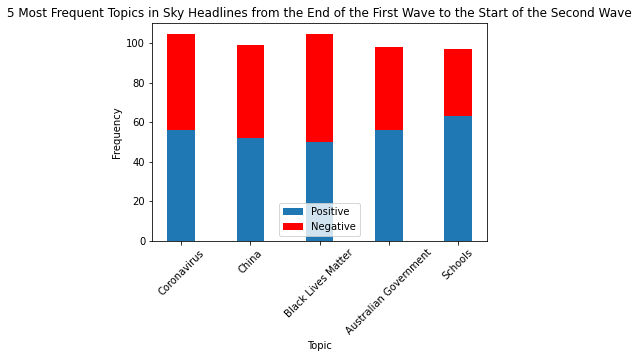

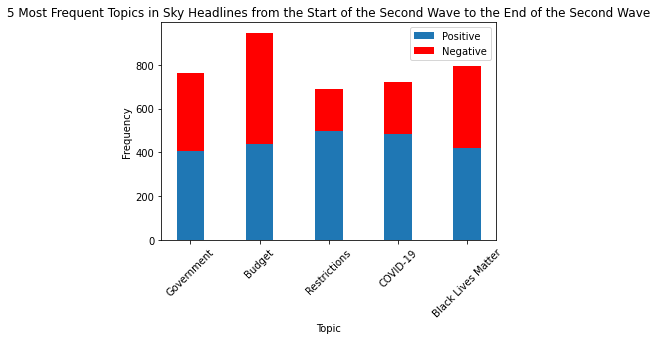

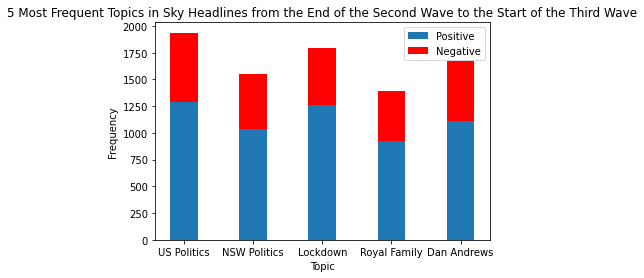

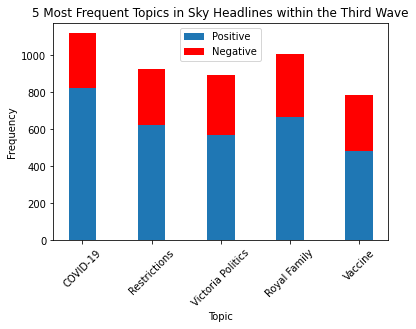

In [1]:
#Sky First Case to First Wave Topics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt




df = pd.read_csv('SkyGraphs2.csv')

fig = plt.figure()

x1 = df['Topic1']
y1= df['TopicFrequency1']
z1 = df['Positive1']
w1 = df['Negative1']

plt.title("5 Most Frequent Topics in Sky Headlines from the First Coronavirus Case to the Start of the First Wave")

plt.xlabel("Topic")

plt.ylabel("Frequency")

plt.xticks(rotation=45)

plt.bar(x1,z1,0.4,label="Positive")
plt.bar(x1,w1,0.4,bottom=z1,label="Negative", color='red')
plt.legend()
plt.show()




x2 = df['Topic2']
y2= df['TopicFrequency2']
z2 = df['Positive2']
w2 = df['Negative2']

plt.title("5 Most Frequent Topic in Sky Headlines from the Start of the First Wave to the end of the First Wave")

plt.xlabel("Topic")

plt.ylabel("Frequency")

plt.xticks(rotation=45)

plt.bar(x2,z2,0.4,label="Positive")
plt.bar(x2,w2,0.4,bottom=z2,label="Negative", color='red')
plt.legend()
plt.show()

x3 = df['Topic3']
y3= df['TopicFrequency3']
z3 = df['Positive3']
w3 = df['Negative3']

plt.title("5 Most Frequent Topics in Sky Headlines from the End of the First Wave to the Start of the Second Wave")

plt.xlabel("Topic")

plt.ylabel("Frequency")

plt.xticks(rotation=45)

plt.bar(x3,z3,0.4,label="Positive")
plt.bar(x3,w3,0.4,bottom=z3,label="Negative", color='red')
plt.legend()
plt.show()

x4 = df['Topic4']
y4= df['TopicFrequency4']
z4 = df['Positive4']
w4 = df['Negative4']

plt.title("5 Most Frequent Topics in Sky Headlines from the Start of the Second Wave to the End of the Second Wave")

plt.xlabel("Topic")

plt.ylabel("Frequency")

plt.xticks(rotation=45)

plt.bar(x4,z4,0.4,label="Positive")
plt.bar(x4,w4,0.4,bottom=z4,label="Negative", color='red')
plt.legend()
plt.show()


x5 = df['Topic5']
y5= df['TopicFrequency5']
z5 = df['Positive5']
w5 = df['Negative5']

plt.title("5 Most Frequent Topics in Sky Headlines from the End of the Second Wave to the Start of the Third Wave")

plt.xlabel("Topic")

plt.ylabel("Frequency")


plt.bar(x5,z5,0.4,label="Positive")
plt.bar(x5,w5,0.4,bottom=z5,label="Negative", color='red')
plt.legend()
plt.show()

x6 = df['Topic6']
y6 = df['TopicFrequency6']
z6 = df['Positive6']
w6 = df['Negative6']

plt.title("5 Most Frequent Topics in Sky Headlines within the Third Wave")

plt.xlabel("Topic")

plt.ylabel("Frequency")

plt.xticks(rotation=45)


plt.bar(x6,z6,0.4,label="Positive")
plt.bar(x6,w6,0.4,bottom=z6,label="Negative", color='red')
plt.legend()
plt.show()

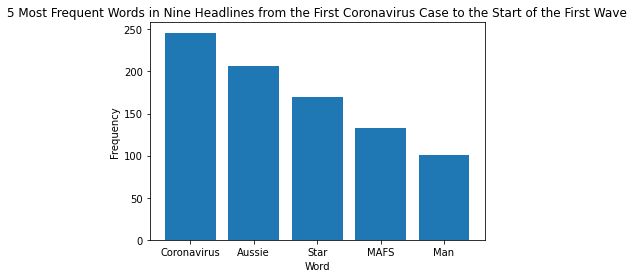

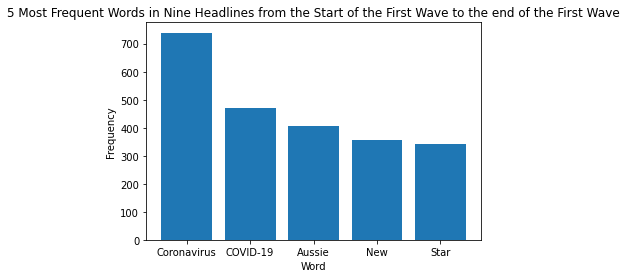

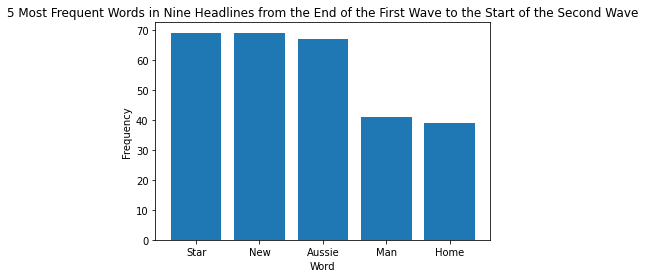

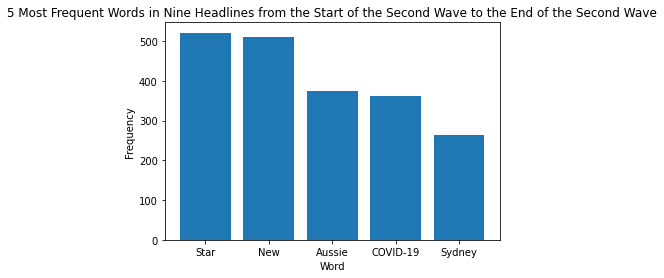

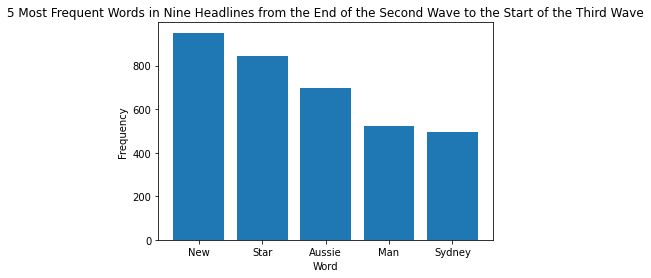

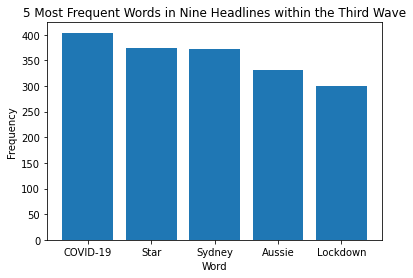

In [108]:
#Nine First Case to First Wave Words
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt




df = pd.read_csv('NineGraphs.csv')

fig = plt.figure()

x1 = df['Word1']
y1= df['WordFrequency1']

plt.title("5 Most Frequent Words in Nine Headlines from the First Coronavirus Case to the Start of the First Wave")

plt.xlabel("Word")

plt.ylabel("Frequency")



plt.bar(x1,y1)
plt.show()




x2 = df['Word2']
y2= df['WordFrequency2']

plt.title("5 Most Frequent Words in Nine Headlines from the Start of the First Wave to the end of the First Wave")

plt.xlabel("Word")

plt.ylabel("Frequency")



plt.bar(x2,y2)
plt.show()

x3 = df['Word3']
y3= df['WordFrequency3']

plt.title("5 Most Frequent Words in Nine Headlines from the End of the First Wave to the Start of the Second Wave")

plt.xlabel("Word")

plt.ylabel("Frequency")



plt.bar(x3,y3)
plt.show()

x4 = df['Word4']
y4= df['WordFrequency4']

plt.title("5 Most Frequent Words in Nine Headlines from the Start of the Second Wave to the End of the Second Wave")

plt.xlabel("Word")

plt.ylabel("Frequency")



plt.bar(x4,y4)
plt.show()


x5 = df['Word5']
y5= df['WordFrequency5']

plt.title("5 Most Frequent Words in Nine Headlines from the End of the Second Wave to the Start of the Third Wave")

plt.xlabel("Word")

plt.ylabel("Frequency")



plt.bar(x5,y5)
plt.show()

x6 = df['Word6']
y6 = df['WordFrequency6']

plt.title("5 Most Frequent Words in Nine Headlines within the Third Wave")

plt.xlabel("Word")

plt.ylabel("Frequency")



plt.bar(x6,y6)
plt.show()


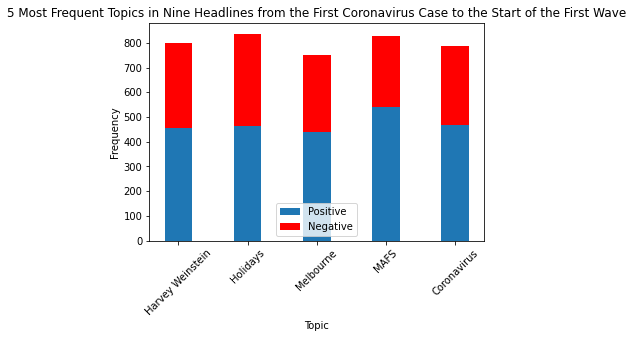

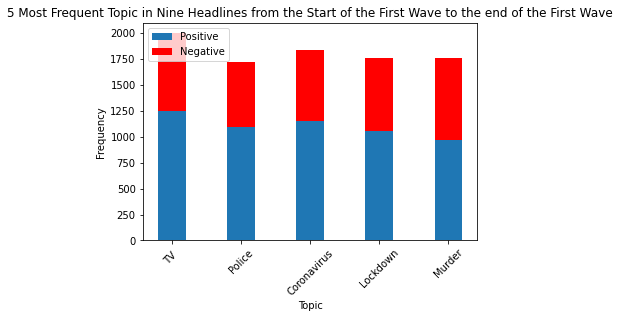

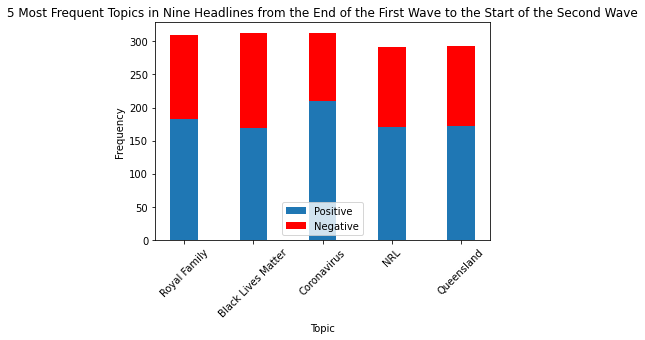

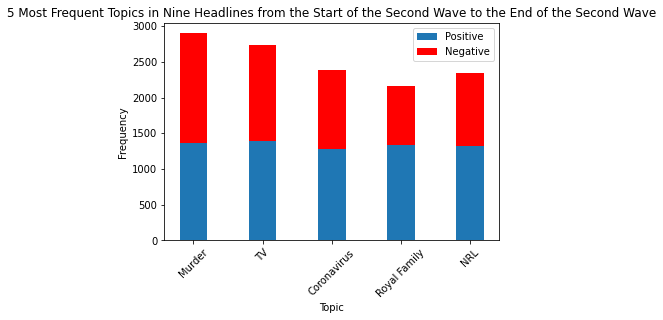

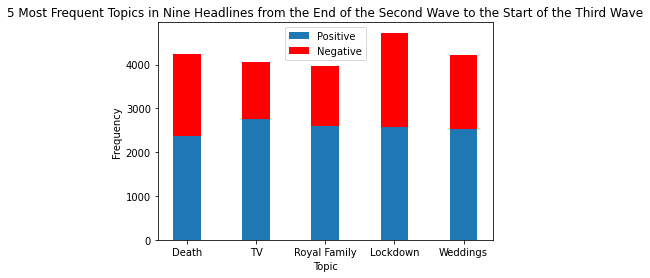

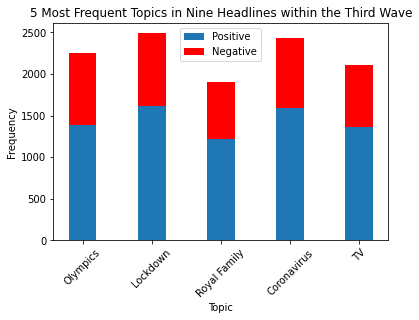

In [116]:
#Nine First Case to First Wave Topics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



df = pd.read_csv('NineGraphs2.csv')

fig = plt.figure()

x1 = df['Topic1']
y1= df['TopicFrequency1']
z1 = df['Positive1']
w1 = df['Negative1']

plt.title("5 Most Frequent Topics in Nine Headlines from the First Coronavirus Case to the Start of the First Wave")

plt.xlabel("Topic")

plt.ylabel("Frequency")

plt.xticks(rotation=45)

plt.bar(x1,z1,0.4,label="Positive")
plt.bar(x1,w1,0.4,bottom=z1,label="Negative", color='red')
plt.legend()
plt.show()




x2 = df['Topic2']
y2= df['TopicFrequency2']
z2 = df['Positive2']
w2 = df['Negative2']

plt.title("5 Most Frequent Topic in Nine Headlines from the Start of the First Wave to the end of the First Wave")

plt.xlabel("Topic")

plt.ylabel("Frequency")

plt.xticks(rotation=45)

plt.bar(x2,z2,0.4,label="Positive")
plt.bar(x2,w2,0.4,bottom=z2,label="Negative", color='red')
plt.legend()
plt.show()

x3 = df['Topic3']
y3= df['TopicFrequency3']
z3 = df['Positive3']
w3 = df['Negative3']

plt.title("5 Most Frequent Topics in Nine Headlines from the End of the First Wave to the Start of the Second Wave")

plt.xlabel("Topic")

plt.ylabel("Frequency")

plt.xticks(rotation=45)

plt.bar(x3,z3,0.4,label="Positive")
plt.bar(x3,w3,0.4,bottom=z3,label="Negative", color='red')
plt.legend()
plt.show()

x4 = df['Topic4']
y4= df['TopicFrequency4']
z4 = df['Positive4']
w4 = df['Negative4']

plt.title("5 Most Frequent Topics in Nine Headlines from the Start of the Second Wave to the End of the Second Wave")

plt.xlabel("Topic")

plt.ylabel("Frequency")

plt.xticks(rotation=45)

plt.bar(x4,z4,0.4,label="Positive")
plt.bar(x4,w4,0.4,bottom=z4,label="Negative", color='red')
plt.legend()
plt.show()


x5 = df['Topic5']
y5= df['TopicFrequency5']
z5 = df['Positive5']
w5 = df['Negative5']

plt.title("5 Most Frequent Topics in Nine Headlines from the End of the Second Wave to the Start of the Third Wave")

plt.xlabel("Topic")

plt.ylabel("Frequency")



plt.bar(x5,z5,0.4,label="Positive")
plt.bar(x5,w5,0.4,bottom=z5,label="Negative", color='red')
plt.legend()
plt.show()

x6 = df['Topic6']
y6 = df['TopicFrequency6']
z6 = df['Positive6']
w6 = df['Negative6']

plt.title("5 Most Frequent Topics in Nine Headlines within the Third Wave")

plt.xlabel("Topic")

plt.ylabel("Frequency")

plt.xticks(rotation=45)


plt.bar(x6,z6,0.4,label="Positive")
plt.bar(x6,w6,0.4,bottom=z6,label="Negative", color='red')
plt.legend()
plt.show()

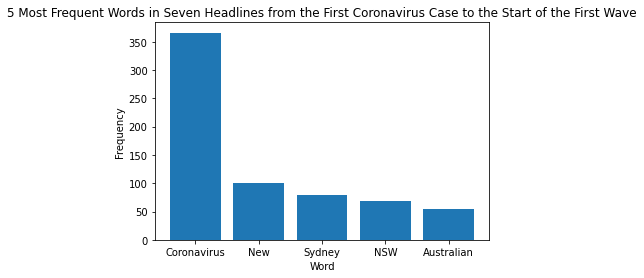

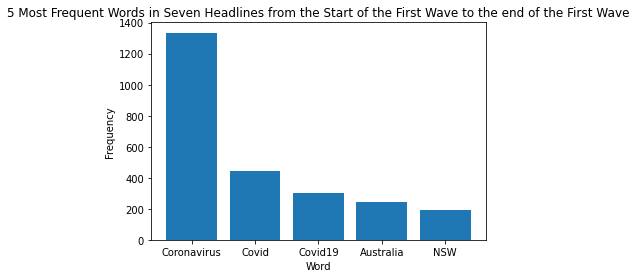

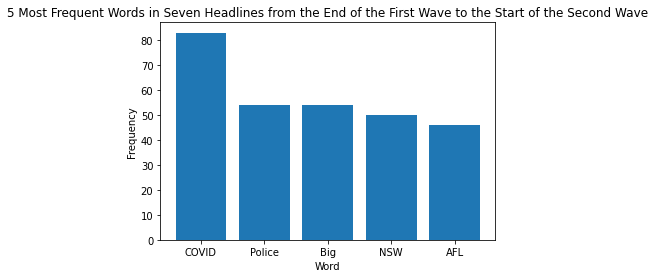

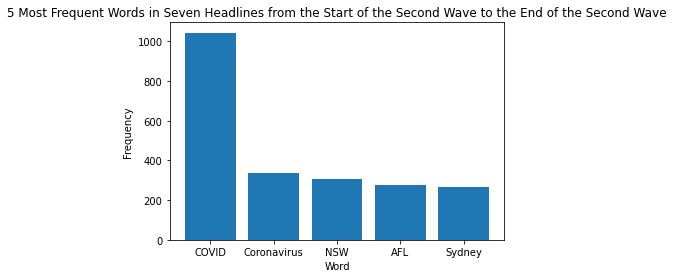

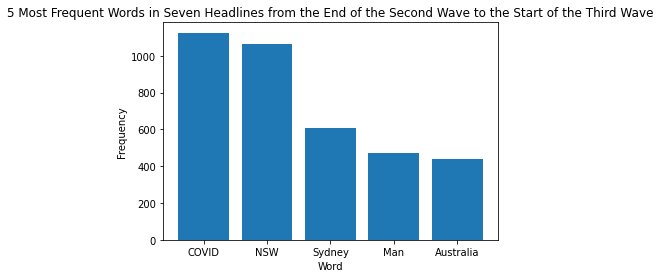

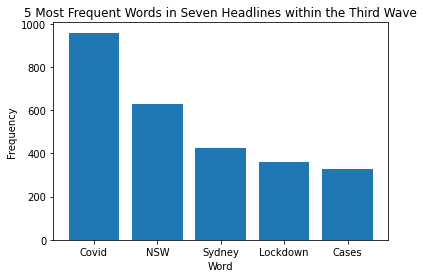

In [110]:
#Seven First Case to First Wave Words
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



df = pd.read_csv('SevenGraphs.csv')

fig = plt.figure()

x1 = df['Word1']
y1= df['WordFrequency1']

plt.title("5 Most Frequent Words in Seven Headlines from the First Coronavirus Case to the Start of the First Wave")

plt.xlabel("Word")

plt.ylabel("Frequency")



plt.bar(x1,y1)
plt.show()




x2 = df['Word2']
y2= df['WordFrequency2']

plt.title("5 Most Frequent Words in Seven Headlines from the Start of the First Wave to the end of the First Wave")

plt.xlabel("Word")

plt.ylabel("Frequency")



plt.bar(x2,y2)
plt.show()

x3 = df['Word3']
y3= df['WordFrequency3']

plt.title("5 Most Frequent Words in Seven Headlines from the End of the First Wave to the Start of the Second Wave")

plt.xlabel("Word")

plt.ylabel("Frequency")



plt.bar(x3,y3)
plt.show()

x4 = df['Word4']
y4= df['WordFrequency4']

plt.title("5 Most Frequent Words in Seven Headlines from the Start of the Second Wave to the End of the Second Wave")

plt.xlabel("Word")

plt.ylabel("Frequency")



plt.bar(x4,y4)
plt.show()


x5 = df['Word5']
y5= df['WordFrequency5']

plt.title("5 Most Frequent Words in Seven Headlines from the End of the Second Wave to the Start of the Third Wave")

plt.xlabel("Word")

plt.ylabel("Frequency")



plt.bar(x5,y5)
plt.show()

x6 = df['Word6']
y6 = df['WordFrequency6']

plt.title("5 Most Frequent Words in Seven Headlines within the Third Wave")

plt.xlabel("Word")

plt.ylabel("Frequency")



plt.bar(x6,y6)
plt.show()


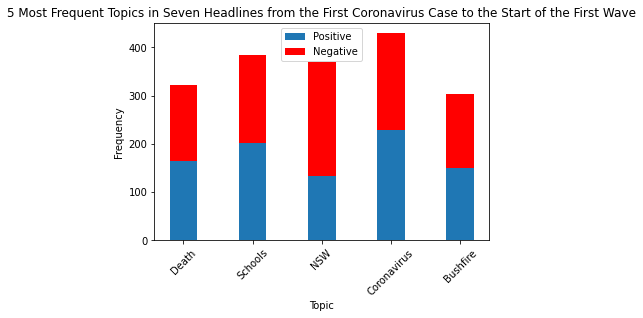

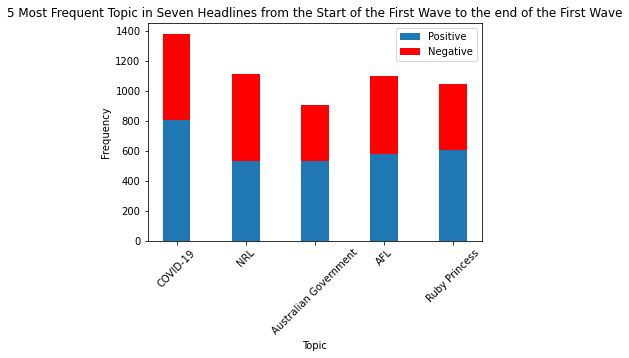

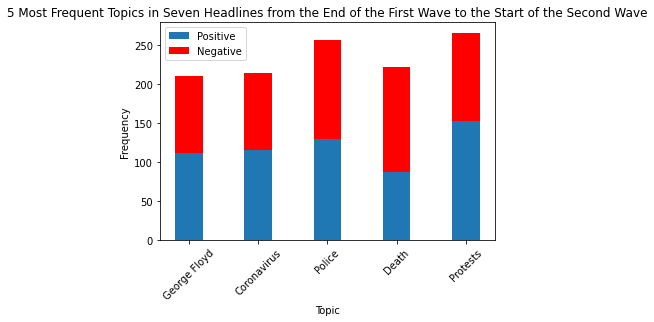

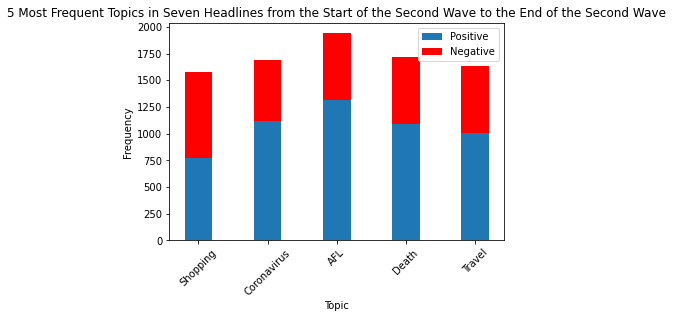

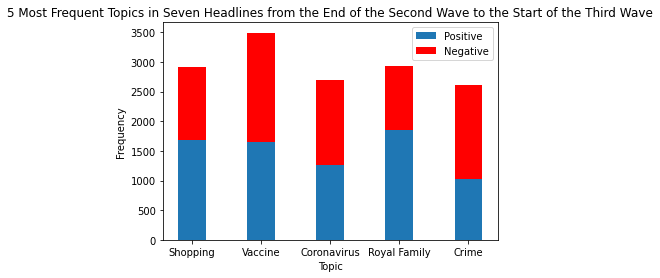

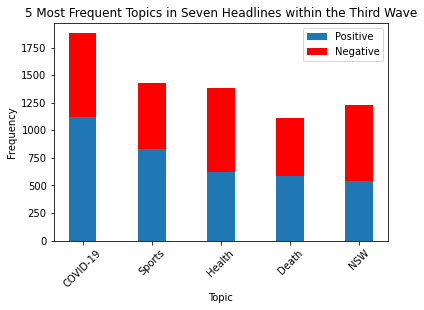

In [118]:
#Seven First Case to First Wave Topics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



df = pd.read_csv('SevenGraphs2.csv')

fig = plt.figure()

x1 = df['Topic1']
y1= df['TopicFrequency1']
z1 = df['Positive1']
w1 = df['Negative1']

plt.title("5 Most Frequent Topics in Seven Headlines from the First Coronavirus Case to the Start of the First Wave")

plt.xlabel("Topic")

plt.ylabel("Frequency")

plt.xticks(rotation=45)

plt.bar(x1,z1,0.4,label="Positive")
plt.bar(x1,w1,0.4,bottom=z1,label="Negative", color='red')
plt.legend()
plt.show()




x2 = df['Topic2']
y2= df['TopicFrequency2']
z2 = df['Positive2']
w2 = df['Negative2']

plt.title("5 Most Frequent Topic in Seven Headlines from the Start of the First Wave to the end of the First Wave")

plt.xlabel("Topic")

plt.ylabel("Frequency")

plt.xticks(rotation=45)

plt.bar(x2,z2,0.4,label="Positive")
plt.bar(x2,w2,0.4,bottom=z2,label="Negative", color='red')
plt.legend()
plt.show()

x3 = df['Topic3']
y3= df['TopicFrequency3']
z3 = df['Positive3']
w3 = df['Negative3']

plt.title("5 Most Frequent Topics in Seven Headlines from the End of the First Wave to the Start of the Second Wave")

plt.xlabel("Topic")

plt.ylabel("Frequency")

plt.xticks(rotation=45)

plt.bar(x3,z3,0.4,label="Positive")
plt.bar(x3,w3,0.4,bottom=z3,label="Negative", color='red')
plt.legend()
plt.show()

x4 = df['Topic4']
y4= df['TopicFrequency4']
z4 = df['Positive4']
w4 = df['Negative4']

plt.title("5 Most Frequent Topics in Seven Headlines from the Start of the Second Wave to the End of the Second Wave")

plt.xlabel("Topic")

plt.ylabel("Frequency")

plt.xticks(rotation=45)

plt.bar(x4,z4,0.4,label="Positive")
plt.bar(x4,w4,0.4,bottom=z4,label="Negative", color='red')
plt.legend()
plt.show()


x5 = df['Topic5']
y5= df['TopicFrequency5']
z5 = df['Positive5']
w5 = df['Negative5']

plt.title("5 Most Frequent Topics in Seven Headlines from the End of the Second Wave to the Start of the Third Wave")

plt.xlabel("Topic")

plt.ylabel("Frequency")



plt.bar(x5,z5,0.4,label="Positive")
plt.bar(x5,w5,0.4,bottom=z5,label="Negative", color='red')
plt.legend()
plt.show()
x6 = df['Topic6']
y6 = df['TopicFrequency6']
z6 = df['Positive6']
w6 = df['Negative6']

plt.title("5 Most Frequent Topics in Seven Headlines within the Third Wave")

plt.xlabel("Topic")

plt.ylabel("Frequency")

plt.xticks(rotation=45)


plt.bar(x6,z6,0.4,label="Positive")
plt.bar(x6,w6,0.4,bottom=z6,label="Negative", color='red')
plt.legend()
plt.show()

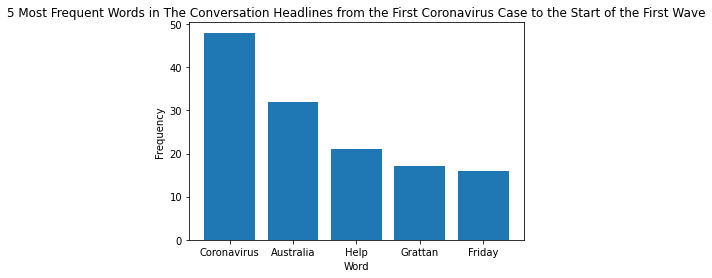

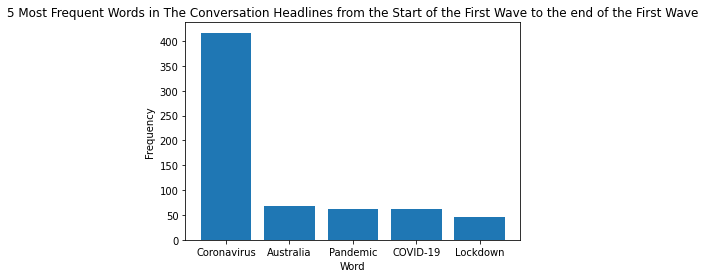

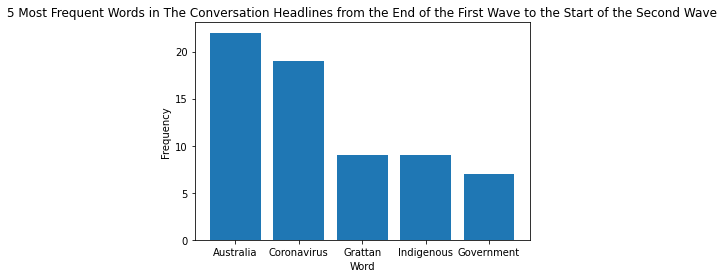

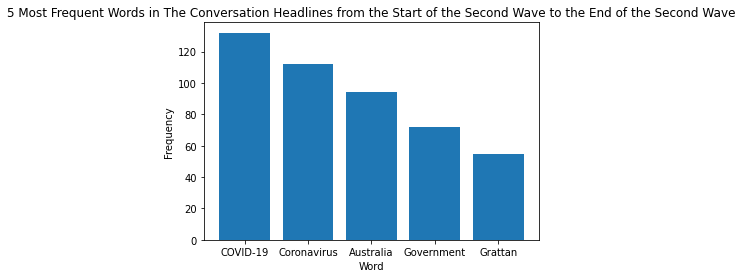

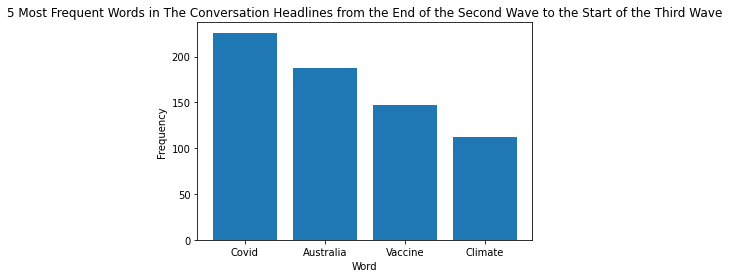

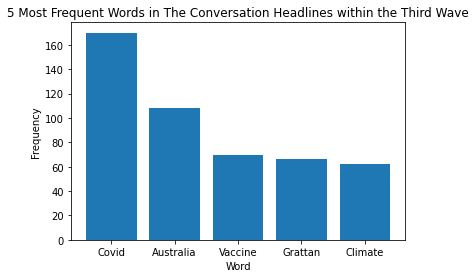

In [115]:
#Conversation First Case to First Wave Words
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt




df = pd.read_csv('Conversation.csv')

fig = plt.figure()

x1 = df['Word1']
y1= df['WordFrequency1']

plt.title("5 Most Frequent Words in The Conversation Headlines from the First Coronavirus Case to the Start of the First Wave")

plt.xlabel("Word")

plt.ylabel("Frequency")



plt.bar(x1,y1)
plt.show()




x2 = df['Word2']
y2= df['WordFrequency2']

plt.title("5 Most Frequent Words in The Conversation Headlines from the Start of the First Wave to the end of the First Wave")

plt.xlabel("Word")

plt.ylabel("Frequency")



plt.bar(x2,y2)
plt.show()

x3 = df['Word3']
y3= df['WordFrequency3']

plt.title("5 Most Frequent Words in The Conversation Headlines from the End of the First Wave to the Start of the Second Wave")

plt.xlabel("Word")

plt.ylabel("Frequency")



plt.bar(x3,y3)
plt.show()

x4 = df['Word4']
y4= df['WordFrequency4']

plt.title("5 Most Frequent Words in The Conversation Headlines from the Start of the Second Wave to the End of the Second Wave")

plt.xlabel("Word")

plt.ylabel("Frequency")



plt.bar(x4,y4)
plt.show()


x5 = df['Word5']
y5= df['WordFrequency5']

plt.title("5 Most Frequent Words in The Conversation Headlines from the End of the Second Wave to the Start of the Third Wave")

plt.xlabel("Word")

plt.ylabel("Frequency")



plt.bar(x5,y5)
plt.show()

x6 = df['Word6']
y6 = df['WordFrequency6']

plt.title("5 Most Frequent Words in The Conversation Headlines within the Third Wave")

plt.xlabel("Word")

plt.ylabel("Frequency")



plt.bar(x6,y6)
plt.show()


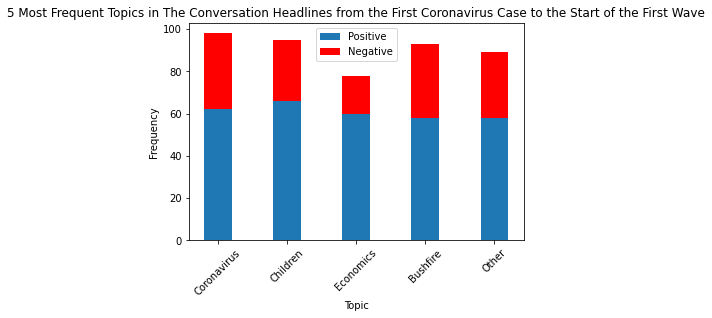

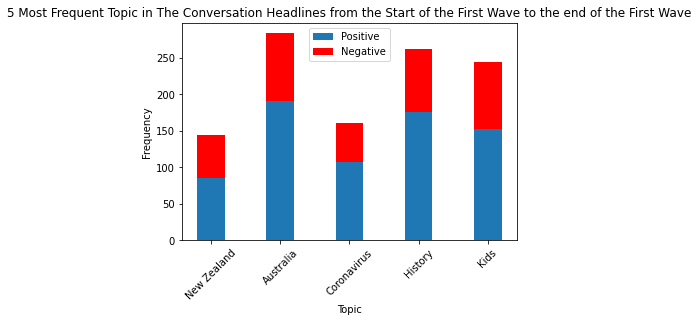

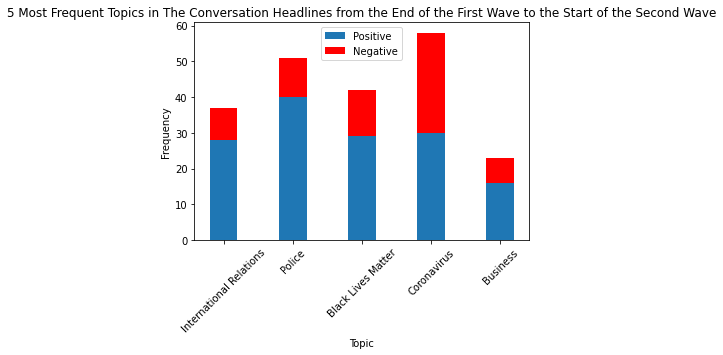

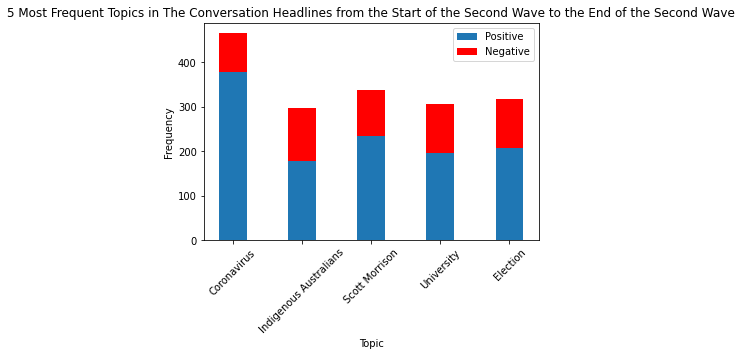

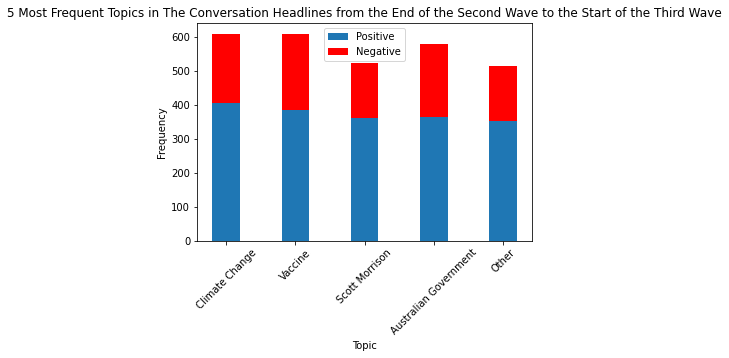

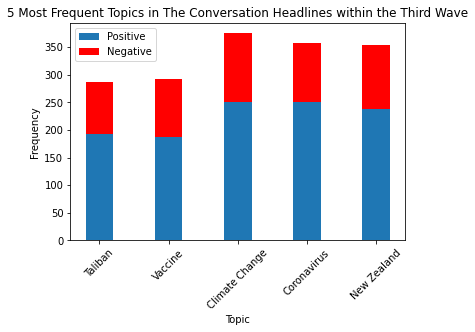

In [11]:
#Conversation First Case to First Wave Topics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt




df = pd.read_csv('Conversation2graphs.csv')

fig = plt.figure()

x1 = df['Topic1']
y1= df['TopicFrequency1']
z1 = df['Positive1']
w1 = df['Negative1']

plt.title("5 Most Frequent Topics in The Conversation Headlines from the First Coronavirus Case to the Start of the First Wave")

plt.xlabel("Topic")

plt.ylabel("Frequency")

plt.xticks(rotation=45)

plt.bar(x1,z1,0.4,label="Positive")
plt.bar(x1,w1,0.4,bottom=z1,label="Negative", color='red')
plt.legend()
plt.show()




x2 = df['Topic2']
y2= df['TopicFrequency2']
z2 = df['Positive2']
w2 = df['Negative2']

plt.title("5 Most Frequent Topic in The Conversation Headlines from the Start of the First Wave to the end of the First Wave")

plt.xlabel("Topic")

plt.ylabel("Frequency")

plt.xticks(rotation=45)

plt.bar(x2,z2,0.4,label="Positive")
plt.bar(x2,w2,0.4,bottom=z2,label="Negative", color='red')
plt.legend()
plt.show()

x3 = df['Topic3']
y3= df['TopicFrequency3']
z3 = df['Positive3']
w3 = df['Negative3']

plt.title("5 Most Frequent Topics in The Conversation Headlines from the End of the First Wave to the Start of the Second Wave")

plt.xlabel("Topic")

plt.ylabel("Frequency")

plt.xticks(rotation=45)

plt.bar(x3,z3,0.4,label="Positive")
plt.bar(x3,w3,0.4,bottom=z3,label="Negative", color='red')
plt.legend()
plt.show()

x4 = df['Topic4']
y4= df['TopicFrequency4']
z4 = df['Positive4']
w4 = df['Negative4']

plt.title("5 Most Frequent Topics in The Conversation Headlines from the Start of the Second Wave to the End of the Second Wave")

plt.xlabel("Topic")

plt.ylabel("Frequency")

plt.xticks(rotation=45)

plt.bar(x4,z4,0.4,label="Positive")
plt.bar(x4,w4,0.4,bottom=z4,label="Negative", color='red')
plt.legend()
plt.show()


x5 = df['Topic5']
y5= df['TopicFrequency5']
z5 = df['Positive5']
w5 = df['Negative5']

plt.title("5 Most Frequent Topics in The Conversation Headlines from the End of the Second Wave to the Start of the Third Wave")

plt.xlabel("Topic")

plt.ylabel("Frequency")
plt.xticks(rotation=45)


plt.bar(x5,z5,0.4,label="Positive")
plt.bar(x5,w5,0.4,bottom=z5,label="Negative", color='red')
plt.legend()
plt.show()

x6 = df['Topic6']
y6 = df['TopicFrequency6']
z6 = df['Positive6']
w6 = df['Negative6']

plt.title("5 Most Frequent Topics in The Conversation Headlines within the Third Wave")

plt.xlabel("Topic")

plt.ylabel("Frequency")

plt.xticks(rotation=45)


plt.bar(x6,z6,0.4,label="Positive")
plt.bar(x6,w6,0.4,bottom=z6,label="Negative", color='red')
plt.legend()
plt.show()

In [110]:
#Mean Compound Score from first case to start of first wave
import numpy as np
import pandas as pd 
import nltk
from nltk.stem import PorterStemmer
from nltk.util import ngrams
from nltk import pos_tag
from nltk import RegexpParser
import fileinput
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import csv
import re
import matplotlib.pyplot as plt
from matplotlib import rcParams
from datetime import datetime
from collections import Counter
import matplotlib.dates as mdates
import itertools

#Import stop words from nltk.corpus 
stopwords = set(nltk.corpus.stopwords.words('english'))


#Add additional stopwords manualy 
for word in ["its", "would", "us", "then", "so", "it", "thats", "going", "also", "get", "one", 'im','make', 'said','look','able','done','sure','think', 'way', 'go', 'know','got','time','ive','things','well','like','dont','say','right','theyre','first','two','come','every','making','put','want','hes']:
    stopwords.add(word)

#Read File    
df = pd.read_csv('conversation2.csv')

df.sort_values(["Date2"], inplace=True)

df["Titles"]= df["Titles"].str.lower()

df["Titles"] = df["Titles"].apply(lambda x: " ".join([re.sub(r'[^\w\d]','', item.lower()) for item in x.split() if re.sub(r'[^\w\d]','', item.lower()) not in stopwords]))

sid = SentimentIntensityAnalyzer()

df['scores'] = df['Titles'].apply(lambda review: sid.polarity_scores(review))

df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])

df['comp_score'] = df['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

df['Date2'] = df['Date2'].astype(str)

df['Date2'] = df['Date2'].apply(lambda x: datetime.strptime(x, '%Y%m%d').strftime('%Y-%m-%d'))

df = df[(df['Date2'] >= '2021-06-18') & (df['Date2'] <= '2021-10-09')]

#From data, the count vectorizer creates a vocabulary
from sklearn.feature_extraction.text import CountVectorizer 
count_vect = CountVectorizer(max_df=0.8, min_df=2, stop_words='english')
termmatrix = count_vect.fit_transform(df['Titles'].values.astype('U'))

from sklearn.decomposition import LatentDirichletAllocation

#The Latent Dirichlet Allocation creates ten topics from the word data 
LDA = LatentDirichletAllocation(n_components=5, random_state=42)
LDA.fit(termmatrix)

#Print the top ten words for each topic 
for i,topic in enumerate(LDA.components_):
    print(f'Top 10 words for topic #{i}:')
    print([count_vect.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')
    
 
topic_values = LDA.transform(termmatrix)
topic_values.shape
df['Topic'] = topic_values.argmax(axis=1)

freq = df['Topic'].value_counts()



# df = df.groupby('Topic').compound.mean()

# df = df.reset_index()


df = df.groupby(["Topic", "comp_score"]).size().reset_index(name="Count")

df = df.loc[df['comp_score'] == 'neg']

df

Top 10 words for topic #0:
['government', 'nsw', 'grattan', 'taliban', 'years', 'heres', 'australia', 'need', 'afghanistan', 'covid']


Top 10 words for topic #1:
['government', 'australian', 'heres', 'astrazeneca', 'australia', 'australias', 'need', 'friday', 'covid', 'vaccine']


Top 10 words for topic #2:
['lockdown', 'people', 'covid19', 'work', 'health', 'olympics', 'australias', 'covid', 'climate', 'change']


Top 10 words for topic #3:
['need', 'australia', 'view', 'hill', 'politics', 'new', 'covid', 'pandemic', 'michelle', 'grattan']


Top 10 words for topic #4:
['vaccination', 'home', 'help', 'research', 'australian', 'heres', 'zealand', 'covid', 'australia', 'new']




,Topic,comp_score,Count
0,0,neg,94
2,1,neg,105
4,2,neg,125
6,3,neg,108
8,4,neg,116


In [10]:
#Mean Compound Score from first case to start of first wave
import numpy as np
import pandas as pd 
import nltk
from nltk.stem import PorterStemmer
from nltk.util import ngrams
from nltk import pos_tag
from nltk import RegexpParser
import fileinput
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import csv
import re
import matplotlib.pyplot as plt
from matplotlib import rcParams
from datetime import datetime
from collections import Counter
import matplotlib.dates as mdates
import itertools

#Import stop words from nltk.corpus 
stopwords = set(nltk.corpus.stopwords.words('english'))


#Add additional stopwords manualy 
for word in ["its", "would", "us", "then", "so", "it", "thats", "going", "also", "get", "one", 'im','make', 'said','look','able','done','sure','think', 'way', 'go', 'know','got','time','ive','things','well','like','dont','say','right','theyre','first','two','come','every','making','put','want','hes']:
    stopwords.add(word)

sid = SentimentIntensityAnalyzer()

    
score = sid.polarity_scores("black")

score


{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}